# GPU Setup

Next two cells are for GPU setup.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

GPU setup complete

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 8)
sns.set_palette(palette)

# Load Data

In [3]:
df = pd.read_csv('./Data/data_eda.csv')
pd.set_option('display.max_columns', len(df.columns))
df.head()

price  security_deposit  cleaning_fee  guests_included  maximum_nights  \
0  122.0        500.000000         240.0                3             730   
1  168.0          0.000000         100.0                6              14   
2   79.0        480.000000          89.0                1             366   
3  140.0        453.166605         100.0                1             180   
4   80.0        100.000000          75.0                1             730   

   accommodates  cancellation_policy  bedrooms  bed_type  bathrooms  zipcode  \
0             6                    6       2.0         4        2.0      298   
1             6                    0       3.0         4        1.0      161   
2             1                    6       1.0         4        1.5      267   
3             1                    6       1.0         3        1.0       27   
4             2                    6       1.0         4        1.0       49   

   room_type  number_of_reviews  property_type  neighbourhood_cleansed  beds  \
0          0                  2             15                      53   3.0   
1          0                  6             25                      31   3.0   
2          1                 20              1                      99   1.0   
3          1                 18              1                     192   1.0   
4          0                  0              1                      22   1.0   

   logPrice  check_in_24h  air_conditioning  bbq  balcony  bed_linen  \
0  4.804021           1.0               1.0  0.0      0.0        0.0   
1  5.123964           1.0               1.0  1.0      1.0        0.0   
2  4.369448           1.0               1.0  0.0      1.0        1.0   
3  4.941642           0.0               0.0  0.0      0.0        0.0   
4  4.382027           0.0               1.0  0.0      0.0        0.0   

   breakfast   tv  coffee_machine  cooking_basics  white_goods  elevator  gym  \
0        0.0  1.0             0.0             0.0          1.0       1.0  1.0   
1        0.0  1.0             1.0             1.0          1.0       0.0  0.0   
2        1.0  0.0             1.0             1.0          1.0       1.0  1.0   
3        0.0  0.0             0.0             0.0          1.0       0.0  0.0   
4        0.0  1.0             0.0             0.0          1.0       0.0  0.0   

   child_friendly  parking  outdoor_space  host_greeting  \
0             1.0      1.0            0.0            0.0   
1             1.0      1.0            0.0            0.0   
2             0.0      1.0            0.0            1.0   
3             0.0      0.0            0.0            1.0   
4             0.0      1.0            0.0            0.0   

   hot_tub_sauna_or_pool  internet  long_term_stays  pets_allowed  \
0                    1.0       1.0              0.0           1.0   
1                    1.0       1.0              0.0           1.0   
2                    1.0       1.0              0.0           0.0   
3                    0.0       1.0              0.0           0.0   
4                    1.0       1.0              0.0           0.0   

   private_entrance  refrigerator  secure  self_check_in  \
0               0.0           0.0     1.0            0.0   
1               0.0           1.0     0.0            0.0   
2               0.0           1.0     1.0            0.0   
3               0.0           0.0     0.0            0.0   
4               0.0           0.0     0.0            0.0   

   latitude_longitude_bin  price_log  accommodates_bedroom_ratio  \
0                      13   4.804021                         3.0   
1                      38   5.123964                         2.0   
2                      26   4.369448                         1.0   
3                      25   4.941642                         1.0   
4                       9   4.382027                         2.0   

   accommodates_bathroom_ratio  
0                     3.000000  
1                     6.000000  
2            

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38974 entries, 0 to 38973
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        38974 non-null  float64
 1   security_deposit             38974 non-null  float64
 2   cleaning_fee                 38974 non-null  float64
 3   guests_included              38974 non-null  int64  
 4   maximum_nights               38974 non-null  int64  
 5   accommodates                 38974 non-null  int64  
 6   cancellation_policy          38974 non-null  int64  
 7   bedrooms                     38974 non-null  float64
 8   bed_type                     38974 non-null  int64  
 9   bathrooms                    38974 non-null  float64
 10  zipcode                      38974 non-null  int64  
 11  room_type                    38974 non-null  int64  
 12  number_of_reviews            38974 non-null  int64  
 13  property_type   

# Functions for plotting

In [5]:
def get_sub_plots(n_total_cols, n_cols, label_font_size = 14, tick_font_size = 13):
    n_rows = int(n_total_cols / n_cols)
    if n_total_cols % n_cols != 0:
        n_rows += 1

    fig, axes = plt.subplots(nrows = n_rows,
                             ncols = n_cols,
                             squeeze = False)
    
    
    fig.set_size_inches(10 * n_cols, 8 * n_rows)  
    
    if n_total_cols % n_cols != 0:
        for col in range(n_total_cols % n_cols, n_cols):
            fig.delaxes(axes[n_rows - 1][col])

    axes = axes.flatten()
    
    for ax in axes:
        ax.tick_params(labelsize = tick_font_size)
        ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
        ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)

    return (fig, axes)

# Functions for Scoring and Reporting

In [6]:
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.metrics import mean_squared_error

def plot_summary(y_test, y_pred, n_total_cols = 4, n_cols = 2, fontsize = 15):
    fig, axes = get_sub_plots(n_total_cols, n_cols)
    
    sns.distplot(y_pred, kde = False, ax = axes[0])
    axes[0].set_title('Histogram of predicted y', fontsize = fontsize)
    axes[0].set_xlabel('Pridected y', fontsize = fontsize)
    axes[0].set_ylabel('Count', fontsize = fontsize)

    sns.regplot(y_test, y_pred, fit_reg = False, ax = axes[1])
    axes[1].set_title('Actual y vs. Predicted y', fontsize = fontsize)
    axes[1].set_xlabel('Actual y', fontsize = fontsize)
    axes[1].set_ylabel('Predicted y', fontsize = fontsize)
    
    sns.regplot(y_pred, y_test - y_pred, fit_reg = False, ax = axes[2])
    axes[2].set_title('Residual Plot', fontsize = fontsize)
    axes[2].set_xlabel('Predicted y', fontsize = fontsize)
    axes[2].set_ylabel('Residuals', fontsize = fontsize)
    
    sns.distplot(y_test - y_pred, kde = False, ax = axes[3])
    axes[3].set_title('Histogram of Residuals', fontsize = fontsize)
    axes[3].set_xlabel('Residuals', fontsize = fontsize)
    axes[3].set_ylabel('Count', fontsize = fontsize)
        
    fig.tight_layout()    
    plt.show()
    
def score_and_plot(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** (1/2)
    
    print ('MSE is: ', mse)
    print ('RMSE is: ', rmse)

    plot_summary(y_test, y_pred)
    
    return rmse

# Prepare functions for Modeling
I will try the following 5 models:
1. K-Nearest Neighbors
- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest

<b>Train-Test-Split, Cross-Validation and Standardization</b>
1. use train_test_split to do train-test split 
- use GridSearchCV to do cross-validation 
- use StandardScaler to standardize the data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

Selected_Models = ['KNN', 'Linear', 'Ridge', 'Lasso', 'RandomForest']
Selected_Linear_Models = ['Linear', 'Ridge', 'Lasso']
modelRmse = {}            #root mean square error


def model(model_type, X, y):
    if model_type not in Selected_Models:
        print('Mode not defined')
        return
    
    steps = [('scaler', StandardScaler())]
    
    if model_type == 'KNN':
        steps += [('knn', KNeighborsRegressor())]
        param_grid = {'knn__n_neighbors': np.arange(1, 50)}
    elif model_type == 'Linear':
        steps += [('lm', LinearRegression())]  
        param_grid = {}          
    elif model_type == 'Ridge':
        steps += [('ridge', Ridge())]
        param_grid = {'ridge__alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}          
    elif model_type == 'Lasso':
        steps = [('lasso', Lasso(max_iter = 10000))]
        param_grid = {'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}          
    elif model_type == 'RandomForest':
        steps = [('rf', RandomForestRegressor(random_state = 42))]
        param_grid = {'rf__n_estimators': np.arange(10, 100, 10),
                      'rf__max_depth' : np.arange(10, 100, 10)}
    
    pipeline = Pipeline(steps)
          
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)
          
    cv = GridSearchCV(pipeline, param_grid, cv = 5)
    cv.fit(X_train, y_train)
          
    print('Model:', model_type)
    print('Best Params:', cv.best_params_)

    y_pred = cv.predict(X_test)
    rmse = score_and_plot(y_test, y_pred)
    return (y_test, y_pred, rmse)

def try_all_models(X, y):
    for model_name in Selected_Models:
        y_test, y_pred, rmse = model(model_name, X, y)
        modelRmse[model_name] = rmse
    return modelRmse

In [8]:
def get_X_y(df, features, target):
    X = df[features].to_numpy()
    y = df[target].to_numpy()
    return (X, y)

# Starting with 'accommodates', 'bathrooms', 'bedrooms' features only. 

In [9]:
X, y = get_X_y(df, ['accommodates', 'bathrooms', 'bedrooms'], 'price')

Model: KNN
Best Params: {'knn__n_neighbors': 22}
MSE is:  198775.2305592038
RMSE is:  445.84215879524425


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


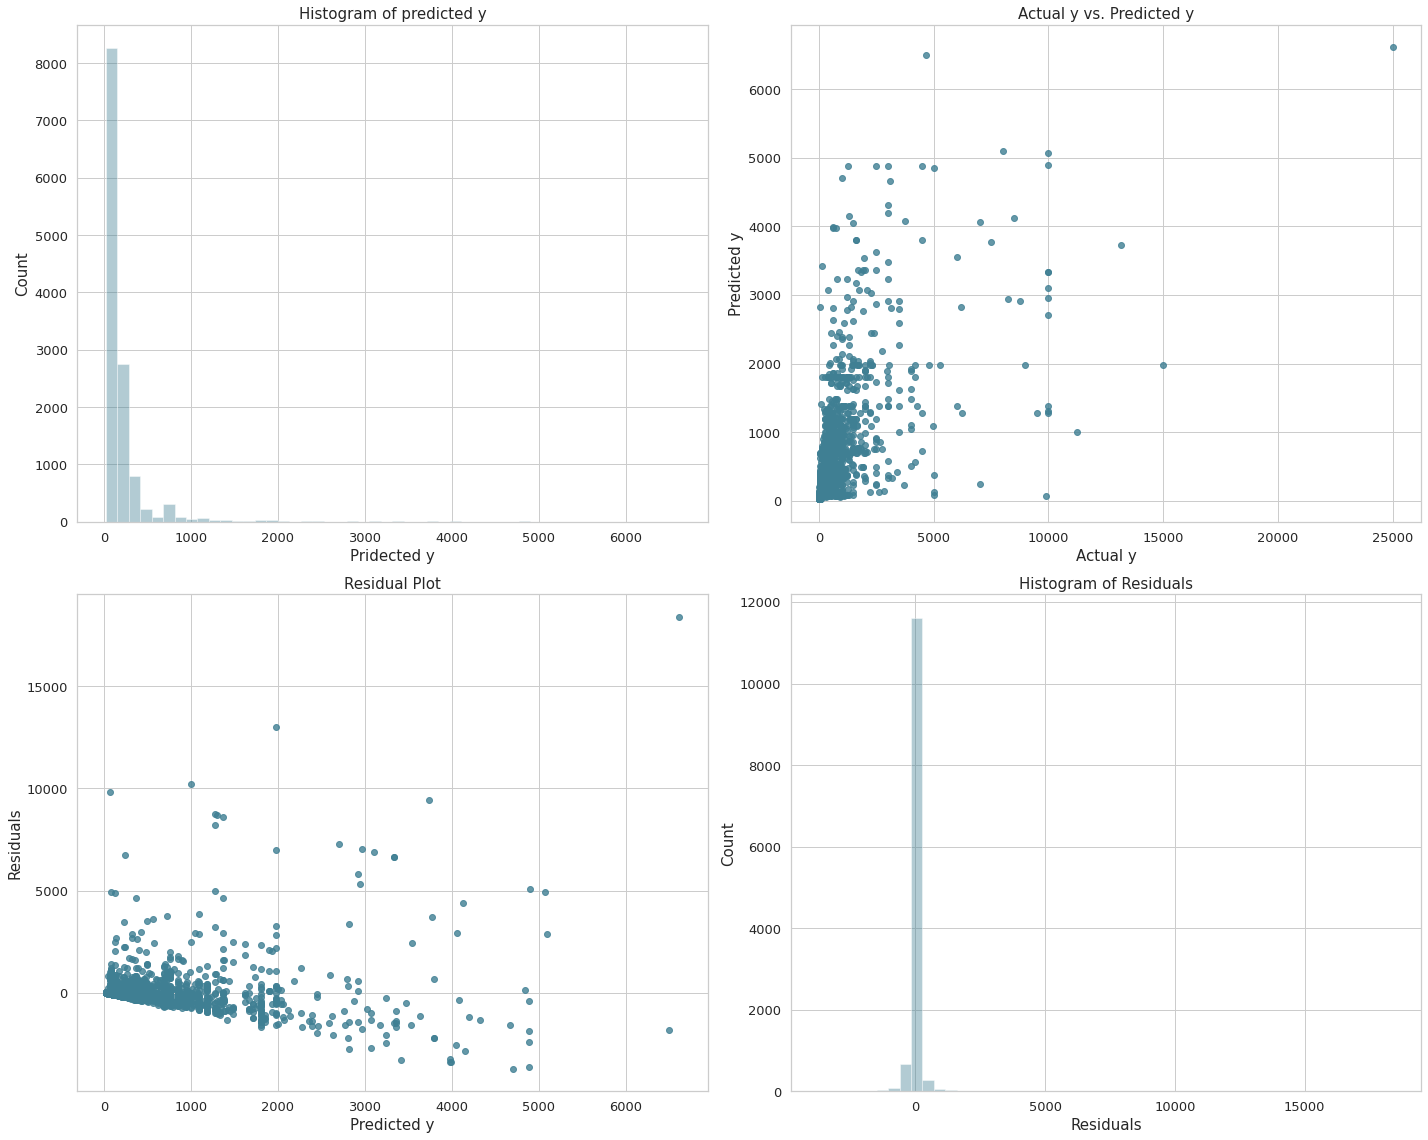

Model: Linear
Best Params: {}
MSE is:  236920.52191545686
RMSE is:  486.7448221763195


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


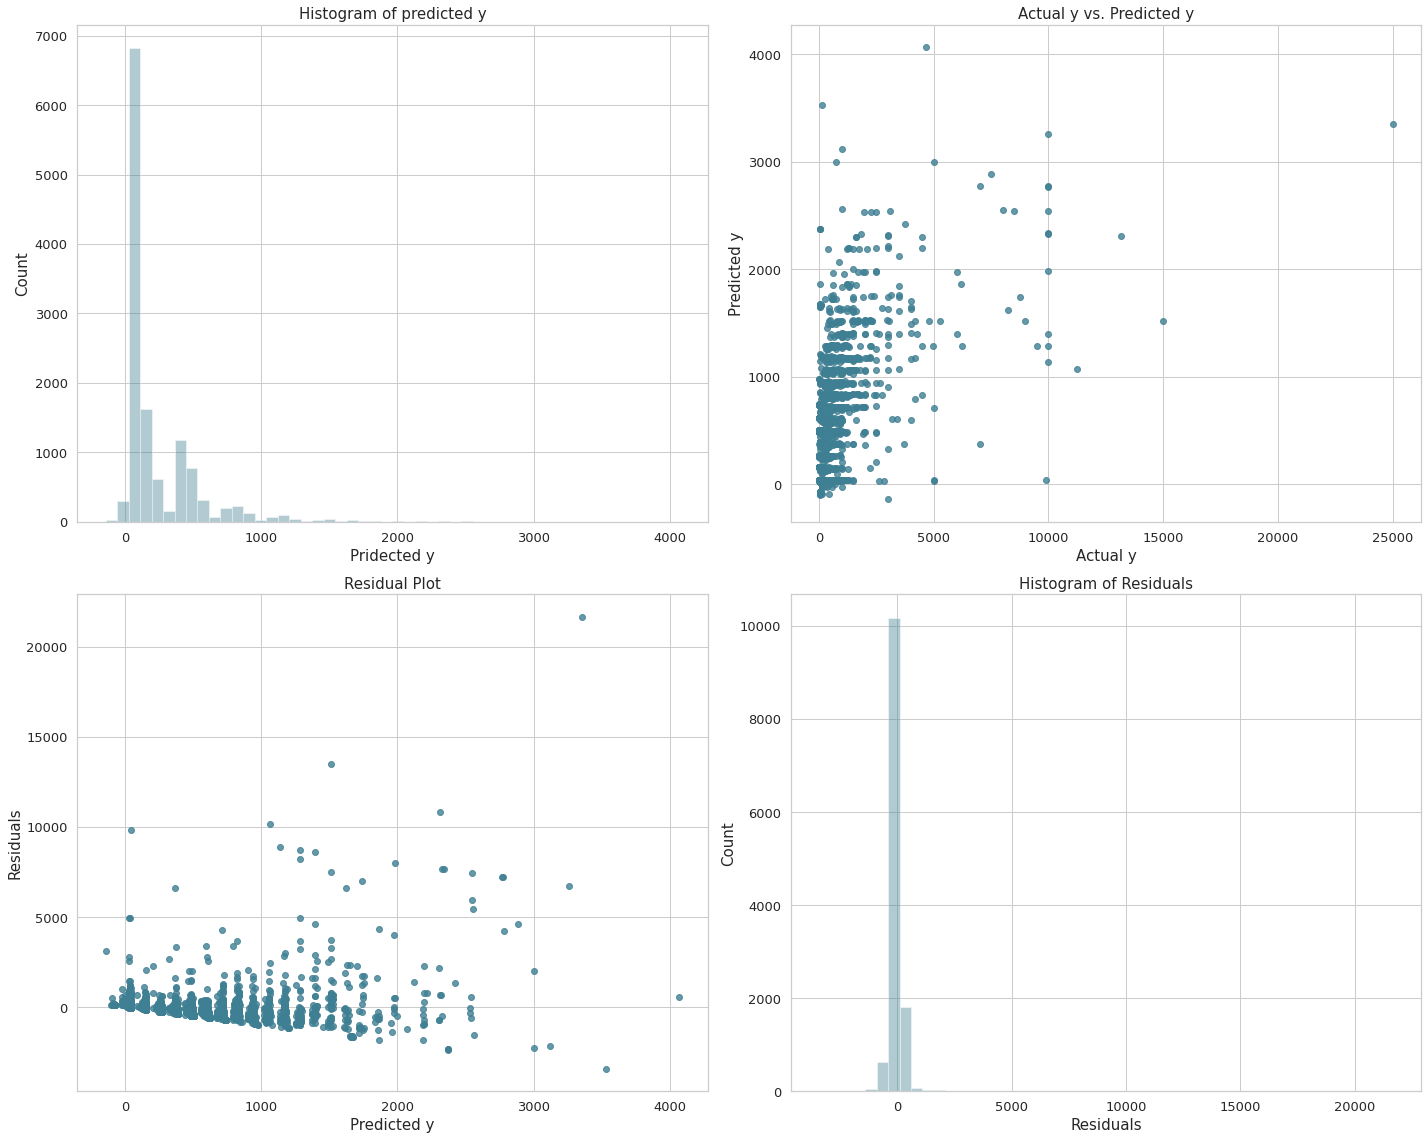

Model: Ridge
Best Params: {'ridge__alpha': 900}
MSE is:  237050.34782892492
RMSE is:  486.87816528257343


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


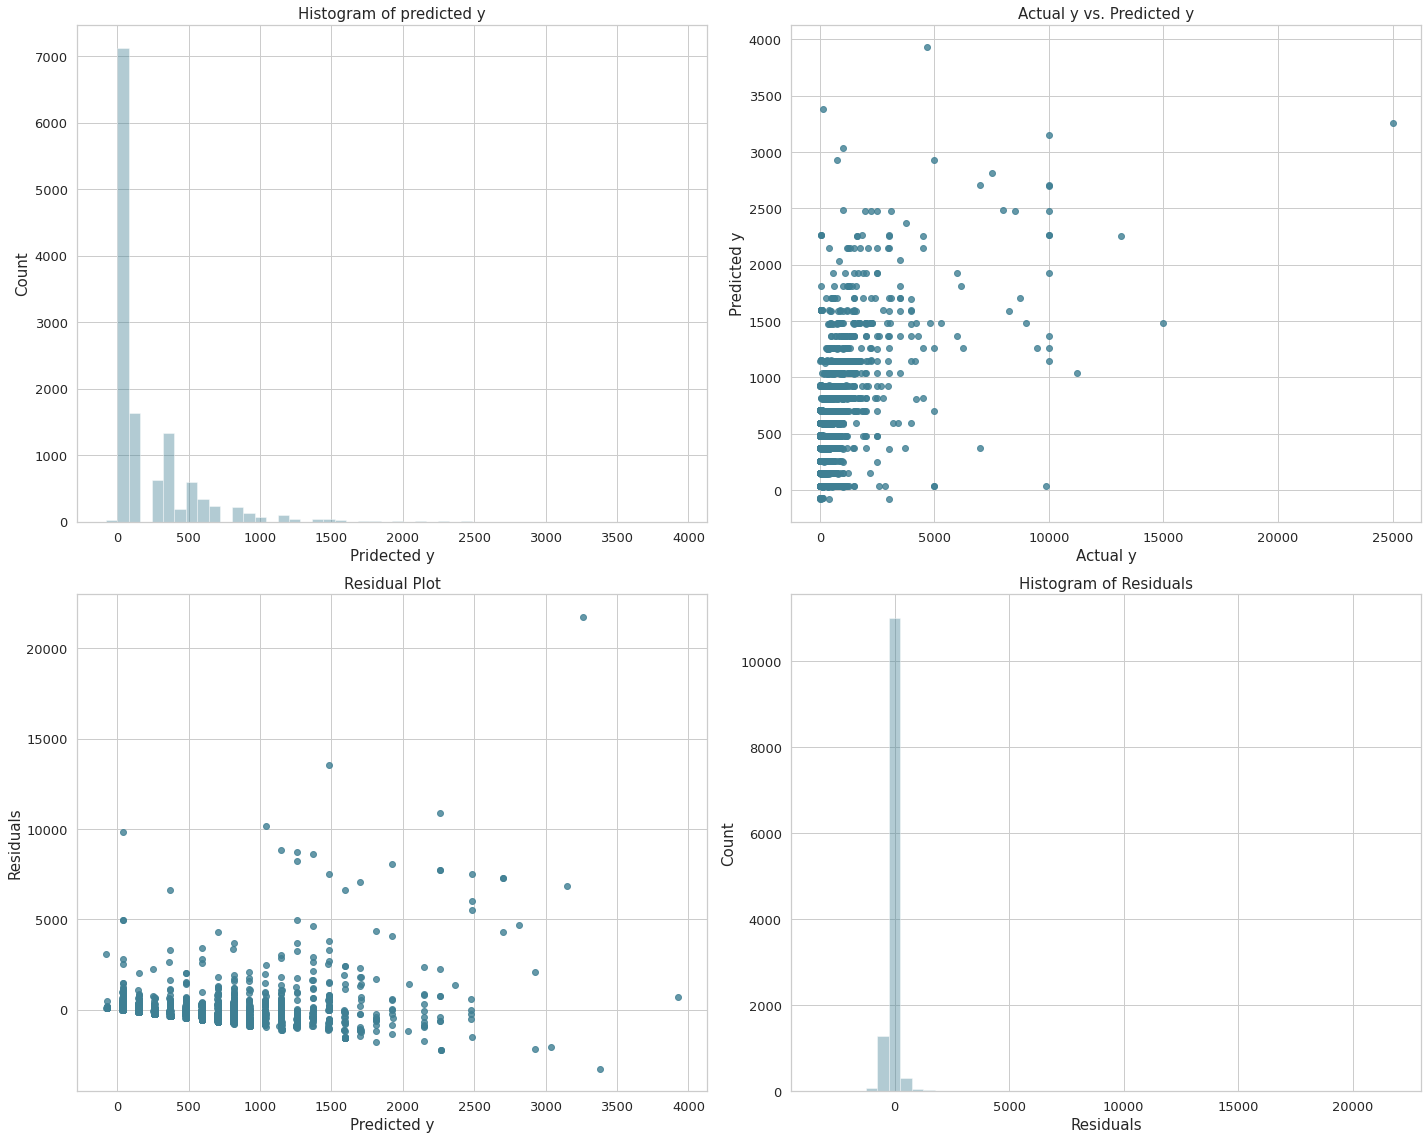

Model: Lasso
Best Params: {'lasso__alpha': 10}
MSE is:  237077.72778581214
RMSE is:  486.90628234375055


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


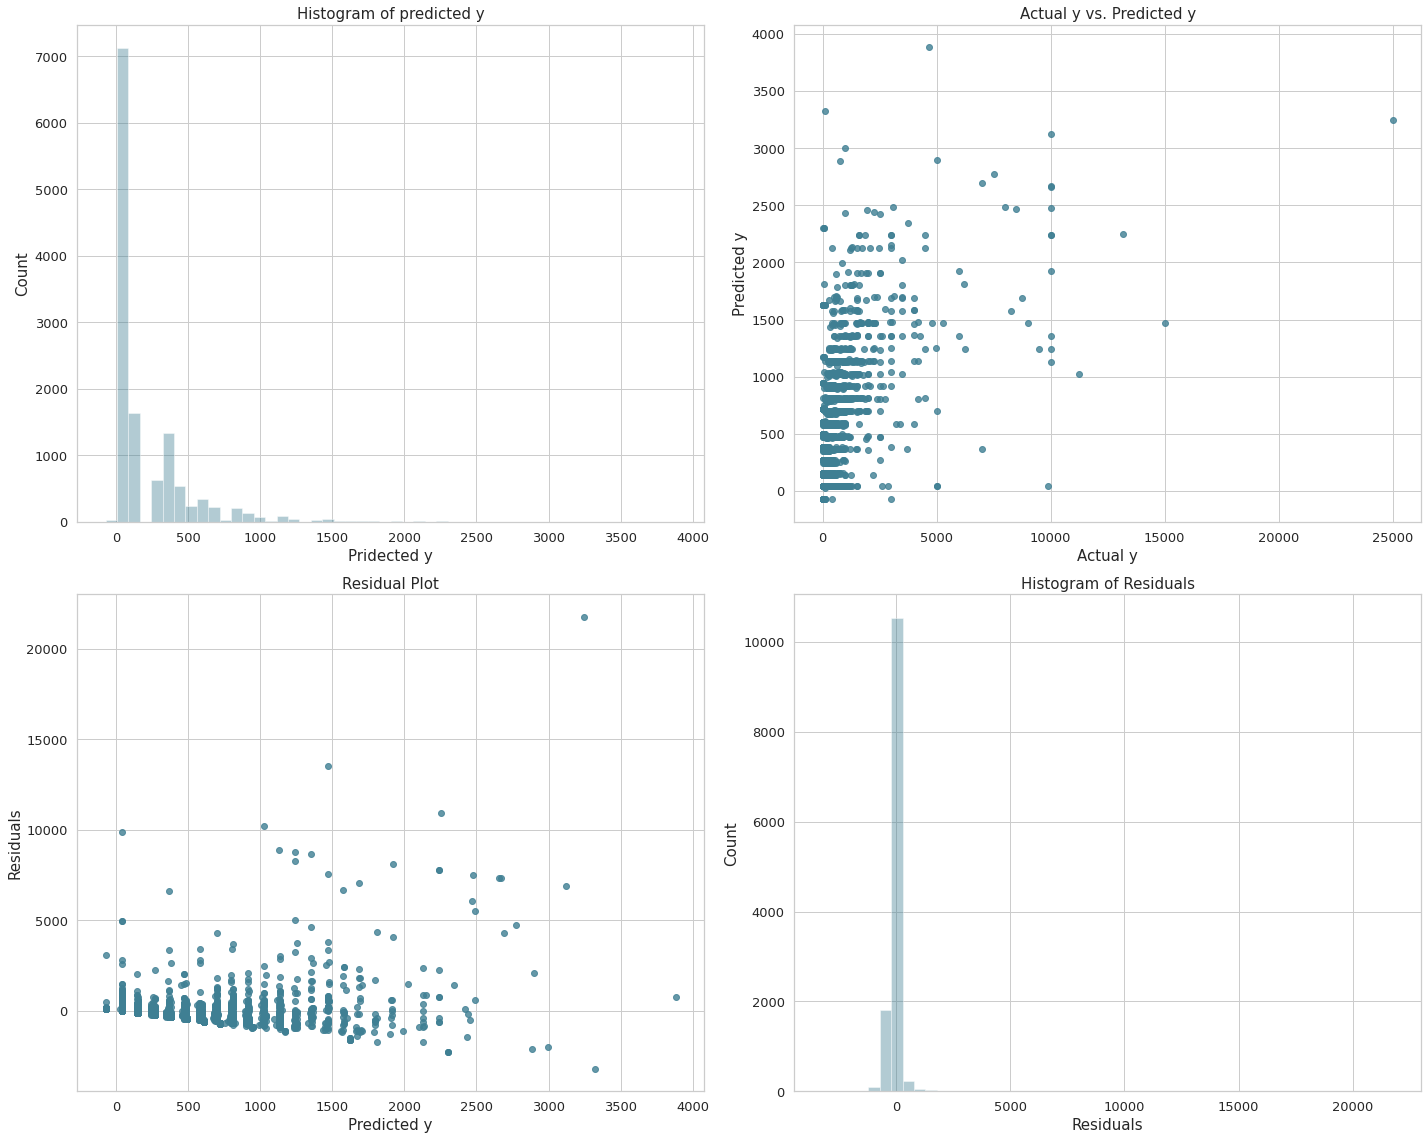

Model: RandomForest
Best Params: {'rf__max_depth': 10, 'rf__n_estimators': 50}
MSE is:  201378.01986641964
RMSE is:  448.7516238036578


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


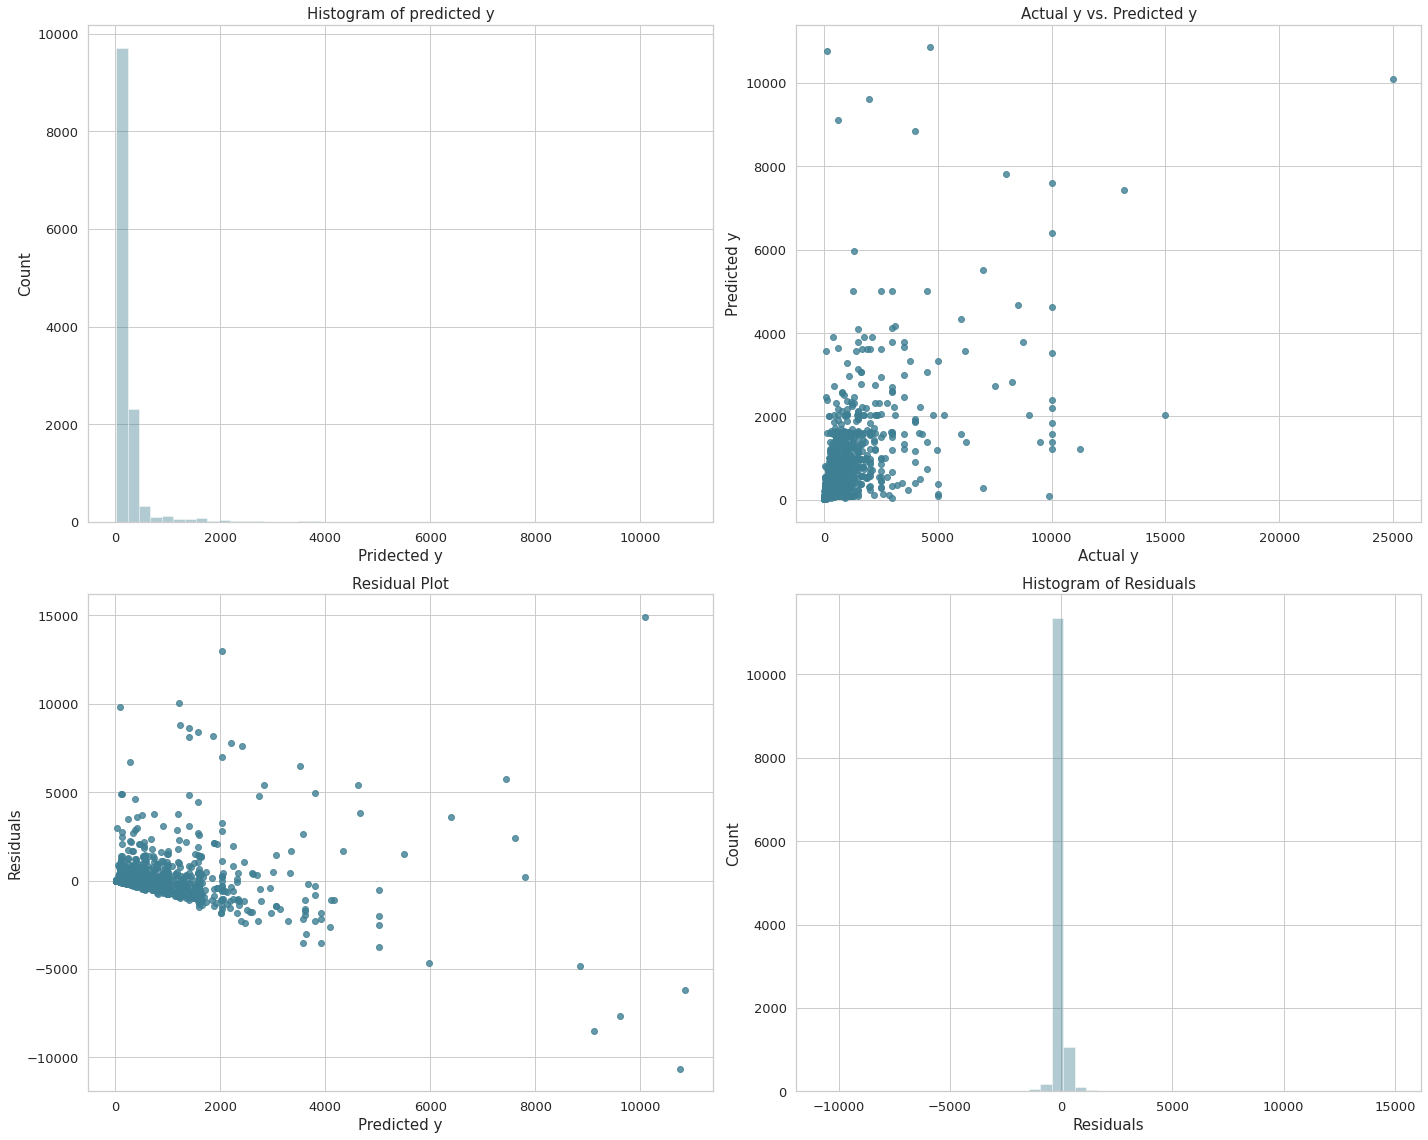

{'KNN': 445.84215879524425,
 'Lasso': 486.90628234375055,
 'Linear': 486.7448221763195,
 'RandomForest': 448.7516238036578,
 'Ridge': 486.87816528257343}

In [42]:
try_all_models(X, y)

In [43]:
# pandas dataframe for model and rmse data
modelRmseDf = pd.DataFrame(list(modelRmse.items()))
modelRmseDf.columns = ['Model', 'RMSE']
modelRmseDf.head()

Model        RMSE
0           KNN  445.842159
1        Linear  486.744822
2         Ridge  486.878165
3         Lasso  486.906282
4  RandomForest  448.751624

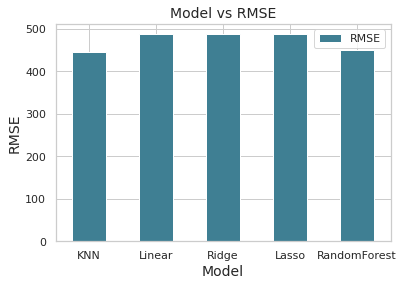

In [44]:
modelRmseDf.plot(x='Model', y='RMSE', kind='bar')
plt.title('Model vs RMSE', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(rotation=0)
plt.show()

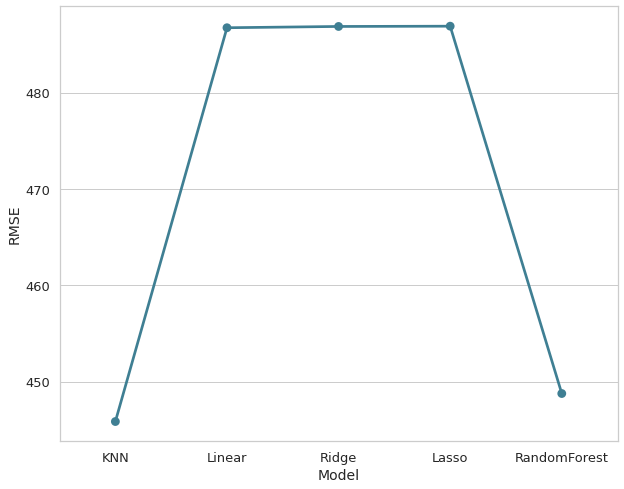

In [45]:
fig, axes = get_sub_plots(1, 1)
sns.pointplot(x = 'Model', y = 'RMSE', data = modelRmseDf, ax = axes[0])
plt.show()

# Use logPrice column instead of price

In [46]:
modelRmse_log = {}            #root mean square error

def try_all_models_log(X, y):
    for model_name in Selected_Models:
        y_test, y_pred, rmse = model(model_type = model_name, X = X, y = y)      
        modelRmse_log[model_name] = rmse
    return modelRmse_log

In [47]:
def get_X_y(df, features, target):
    X = df[features].to_numpy()
    y = df[target].to_numpy()
    return (X, y)

In [48]:
X, y = get_X_y(df, ['accommodates', 'bathrooms', 'bedrooms'], 'logPrice')

Model: KNN
Best Params: {'knn__n_neighbors': 49}
MSE is:  0.31181184150855484
RMSE is:  0.5584011474814095


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


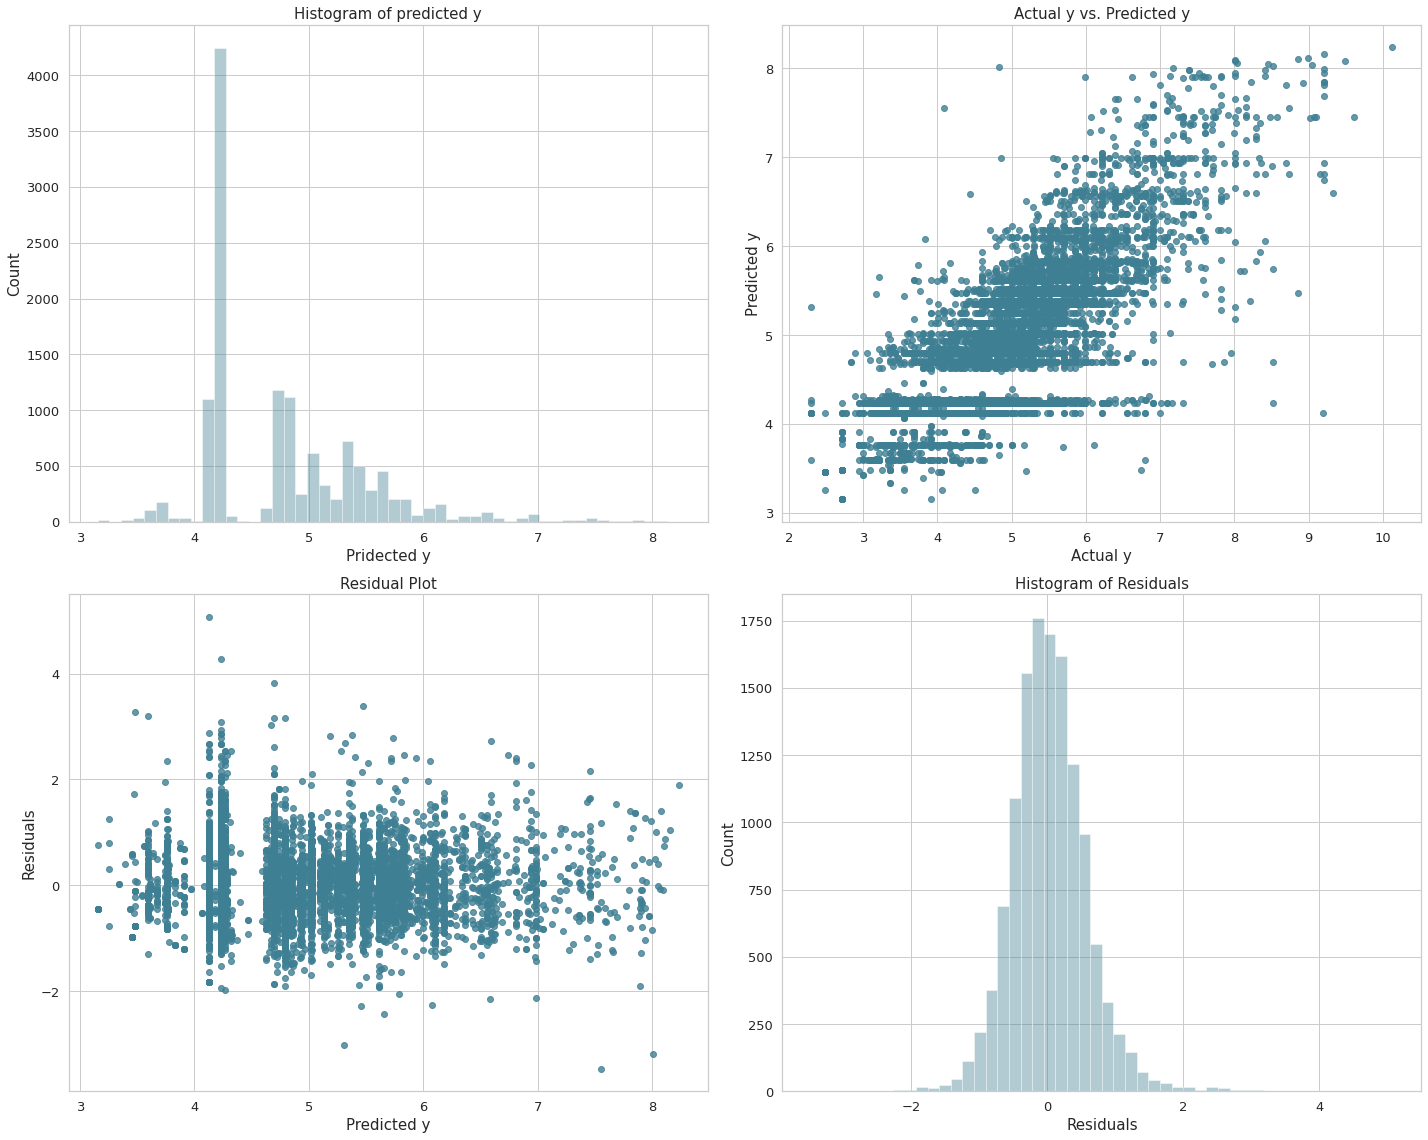

Model: Linear
Best Params: {}
MSE is:  0.3833531336045072
RMSE is:  0.619155177321895


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


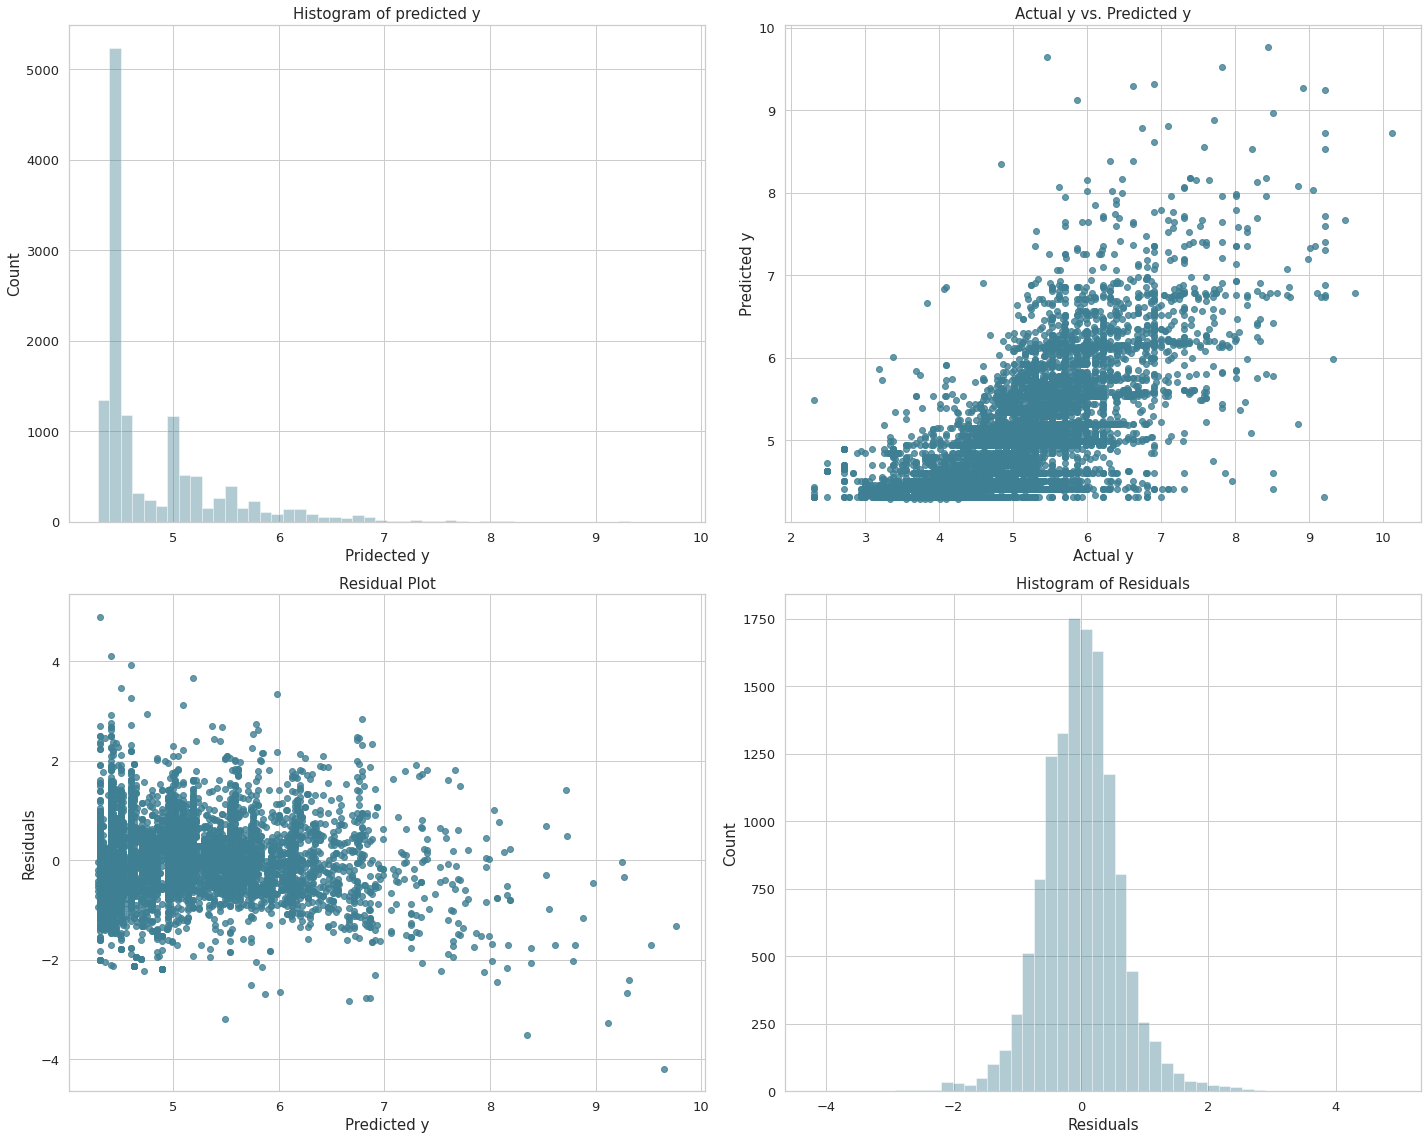

Model: Ridge
Best Params: {'ridge__alpha': 10}
MSE is:  0.38335396414335654
RMSE is:  0.6191558480248383


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


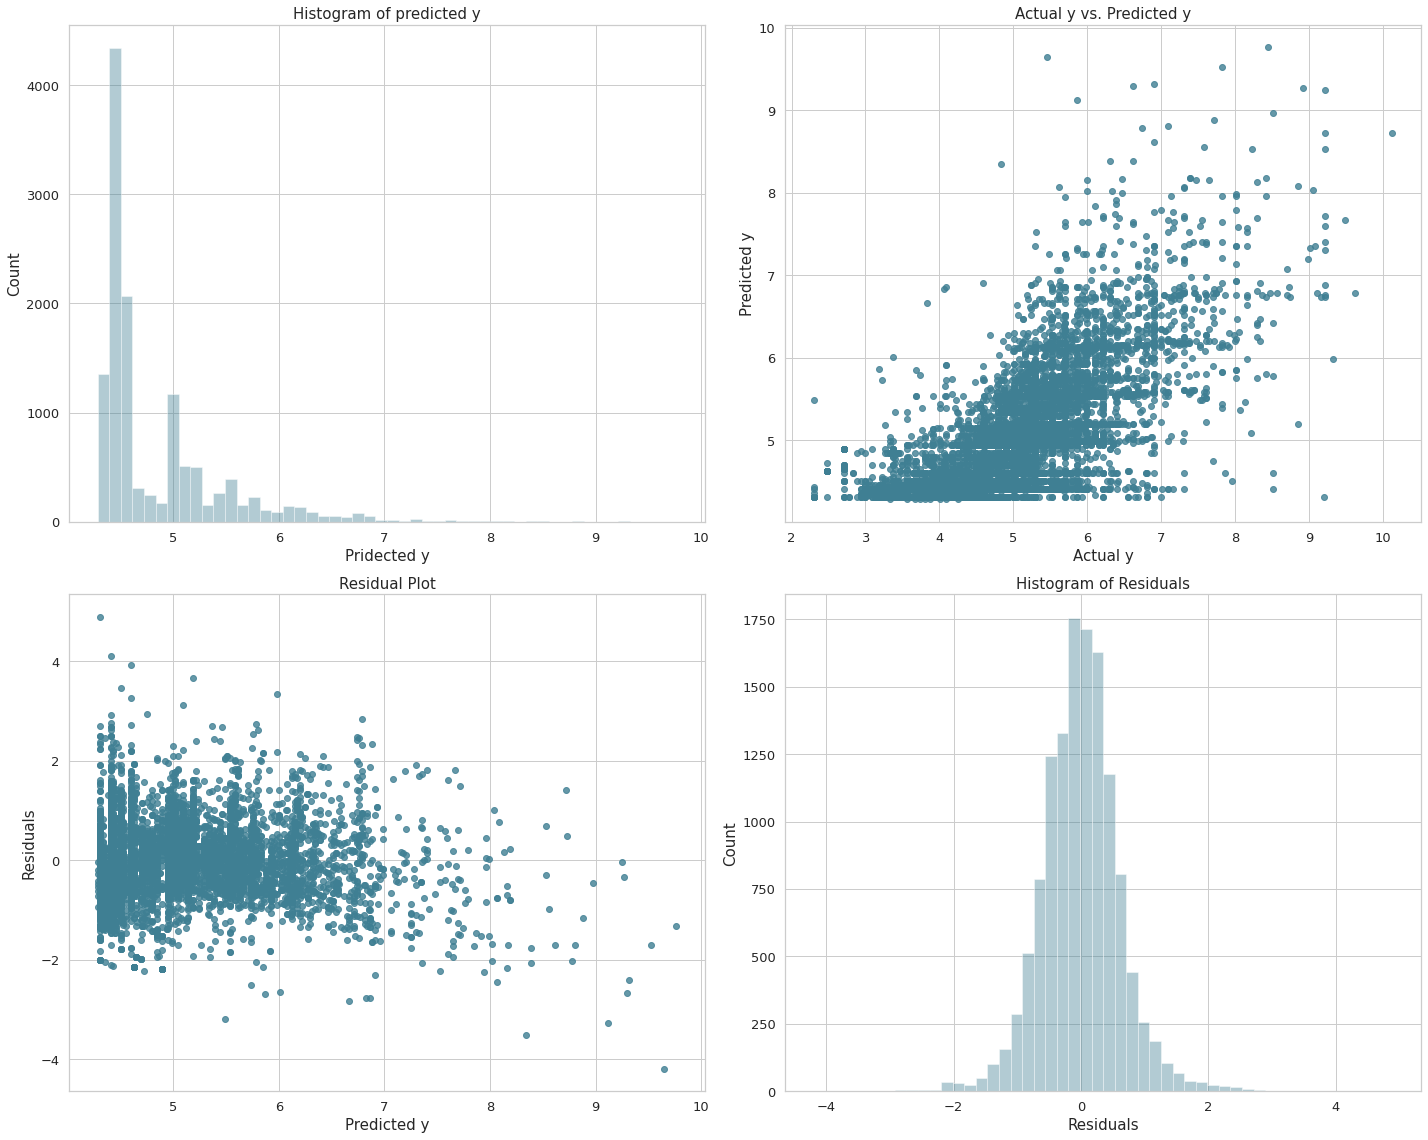

Model: Lasso
Best Params: {'lasso__alpha': 0.0001}
MSE is:  0.3833526040458474
RMSE is:  0.6191547496755939


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


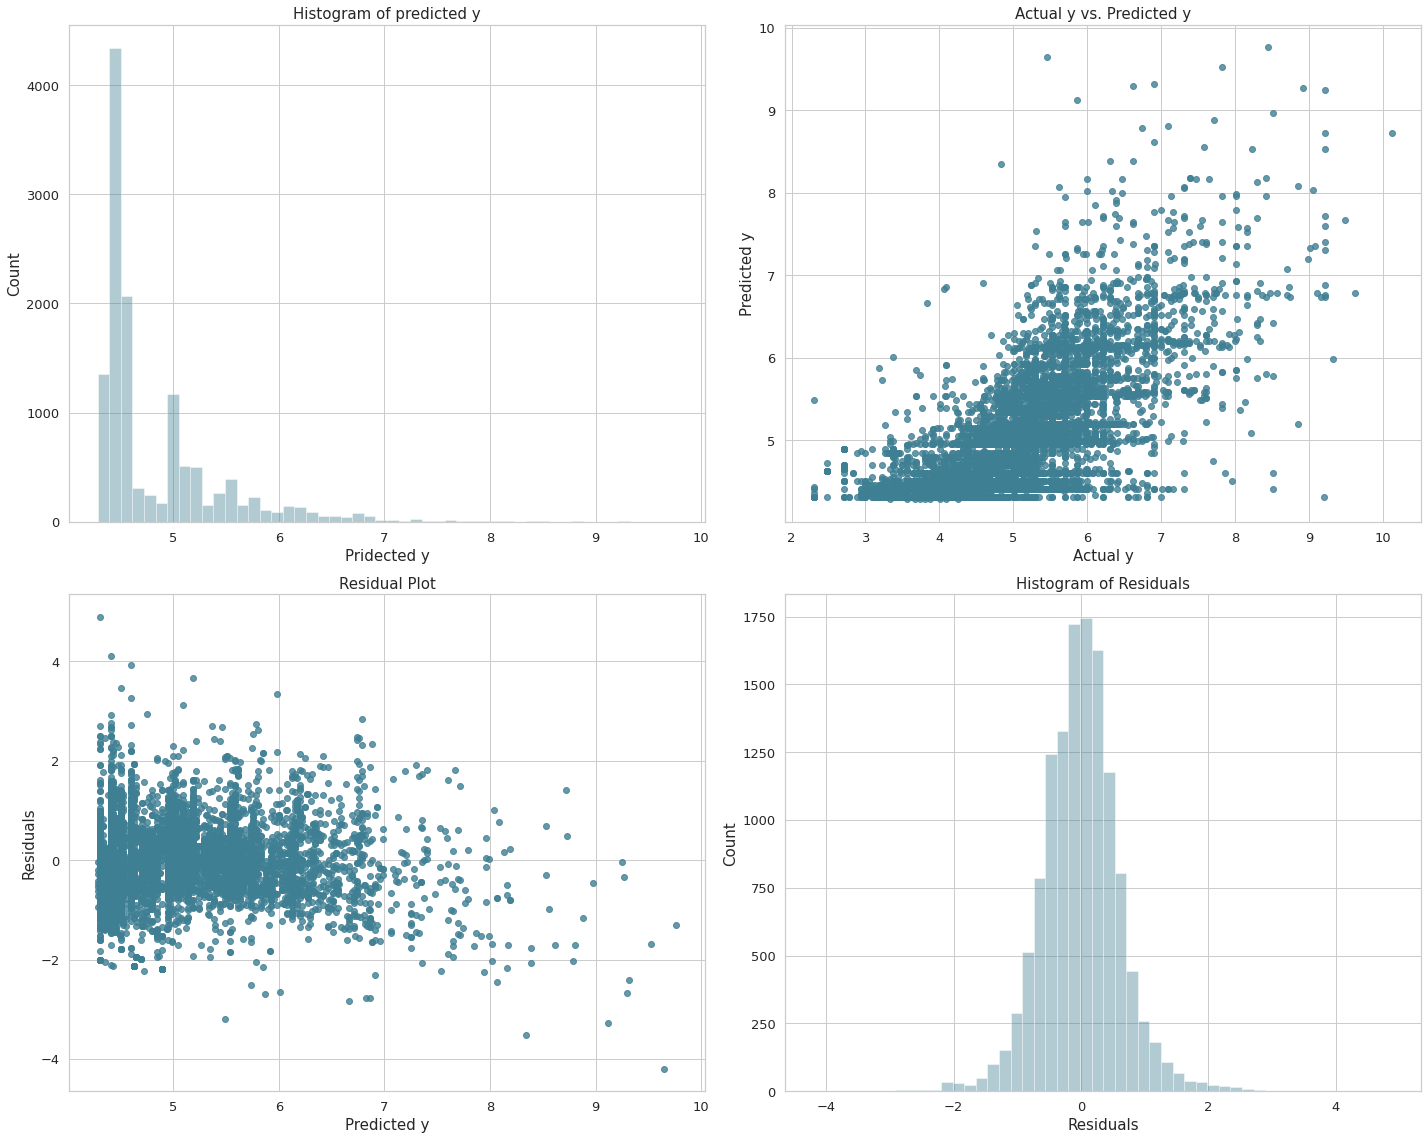

Model: RandomForest
Best Params: {'rf__max_depth': 10, 'rf__n_estimators': 60}
MSE is:  0.299181871428478
RMSE is:  0.5469752018405204


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


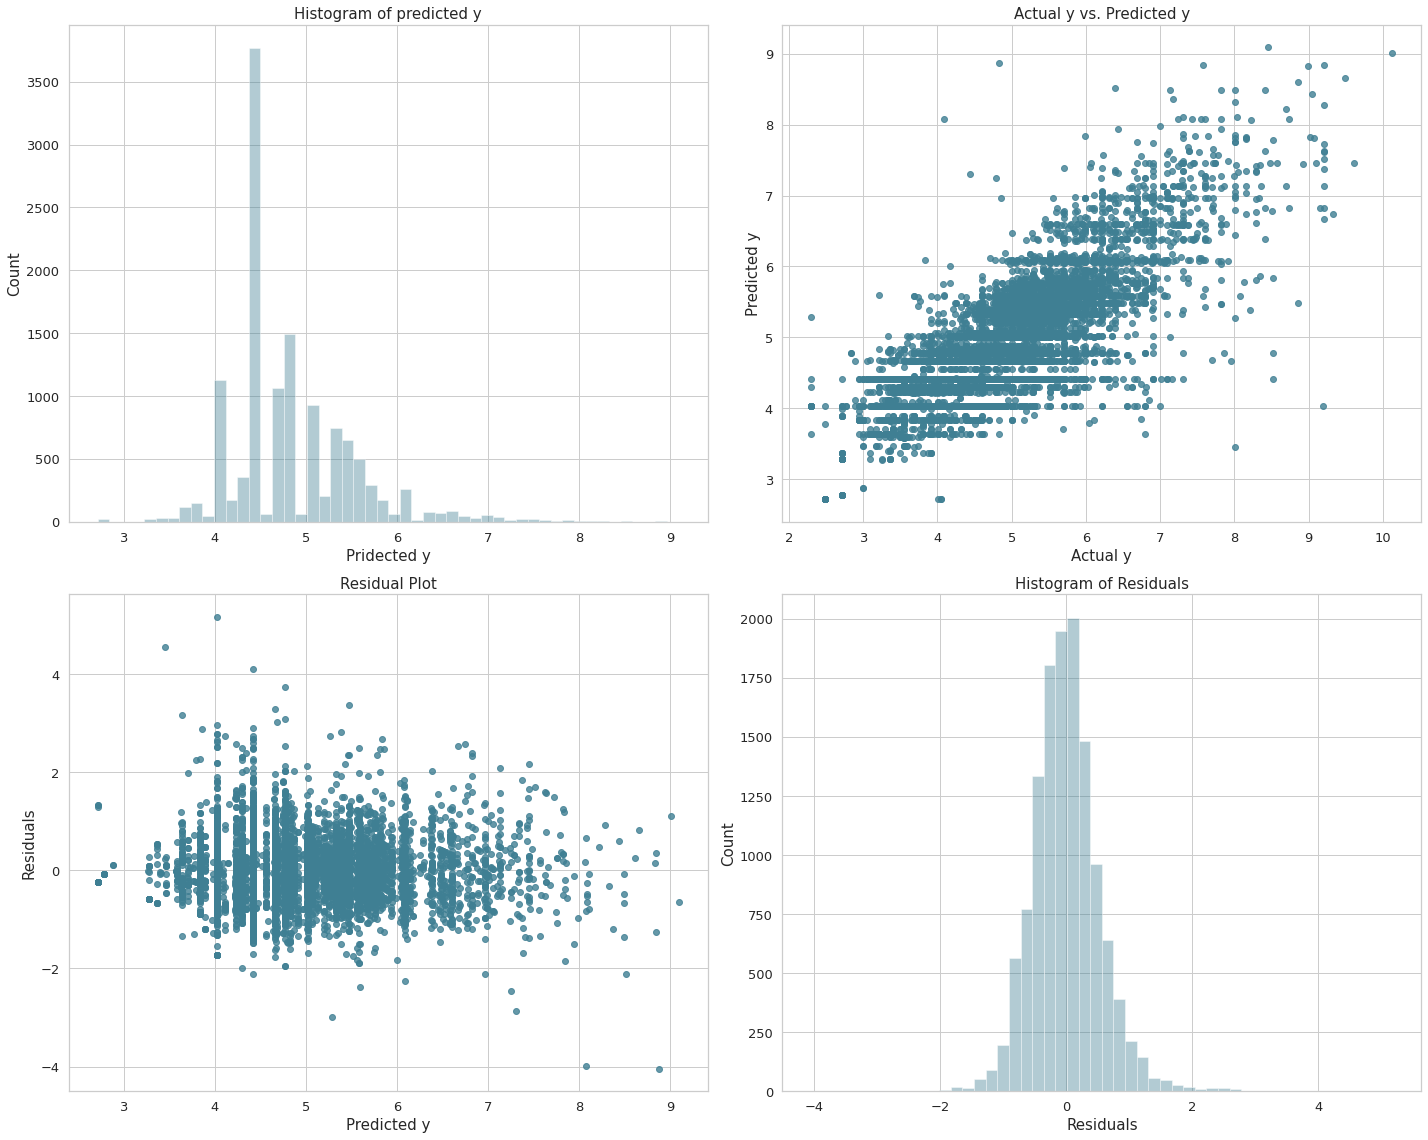

{'KNN': 0.5584011474814095,
 'Lasso': 0.6191547496755939,
 'Linear': 0.619155177321895,
 'RandomForest': 0.5469752018405204,
 'Ridge': 0.6191558480248383}

In [49]:
try_all_models_log(X, y)

In [50]:
# pandas dataframe for model and rmse data
modelRmseDf_log = pd.DataFrame(list(modelRmse_log.items()))
modelRmseDf_log.columns = ['Model', 'RMSE']
modelRmseDf_log.head()

Model      RMSE
0           KNN  0.558401
1        Linear  0.619155
2         Ridge  0.619156
3         Lasso  0.619155
4  RandomForest  0.546975

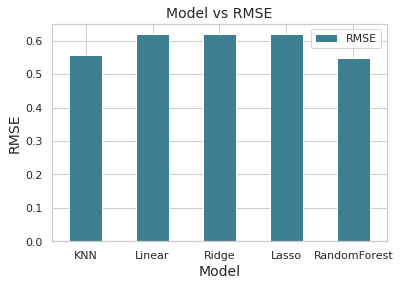

In [51]:
modelRmseDf_log.plot(x='Model', y='RMSE', kind='bar')
plt.title('Model vs RMSE', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(rotation=0)
plt.show()

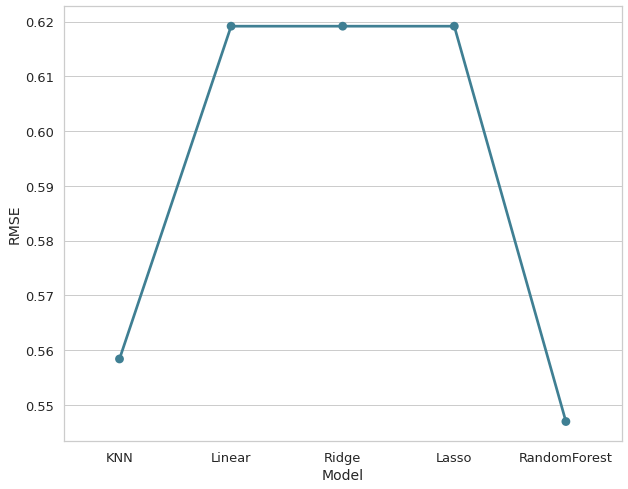

In [52]:
fig, axes = get_sub_plots(1, 1)
sns.pointplot(x = 'Model', y = 'RMSE', data = modelRmseDf_log, ax = axes[0])
plt.show()

## Modeling Results
1. KNN has the best Root Mean Square Error (RMSE) when price column is used.
- RandomForest has the best Root Mean Square Error (RMSE) when logPrice column is used.
- Using logPrice results in higher normal distribution. 

### KNN and RandomForest seem to perform better than other algorithms. Going further will check only KNN and RandomForest

# Add more features and verify

Add property type into features based on the above analysis.

In [53]:
df_property_type = pd.get_dummies(df['property_type'], prefix = 'property_type')
df_property_type.head()

property_type_0  property_type_1  property_type_2  property_type_3  \
0                0                0                0                0   
1                0                0                0                0   
2                0                1                0                0   
3                0                1                0                0   
4                0                1                0                0   

   property_type_4  property_type_5  property_type_6  property_type_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   property_type_8  property_type_9  property_type_11  property_type_12  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                0                0                 0                 0   

   property_type_13  property_type_14  property_type_15  property_type_16  \
0                 0                 0                 1                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   property_type_17  property_type_18  property_type_19  property_type_20  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   property_type_21  property_type_22  property_type_23  property_type_24  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   property_type_25  property_type_26  property_type_27  property_type_28  \
0                 0                 0                 0                 0   
1                 1                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   property_type_29  property_type_30  property_type_31  property_type_32  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   property_type_33  property_type_34  property_type_35  property_type_36  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0              

In [54]:
df_add_property_type = pd.concat([df[['accommodates', 'bathrooms', 'bedrooms']], df_property_type], axis = 1)
X = df_add_property_type.to_numpy()

### Check models with new X and y

Model: KNN
Best Params: {'knn__n_neighbors': 29}
MSE is:  190420.091078791
RMSE is:  436.3715058053069


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


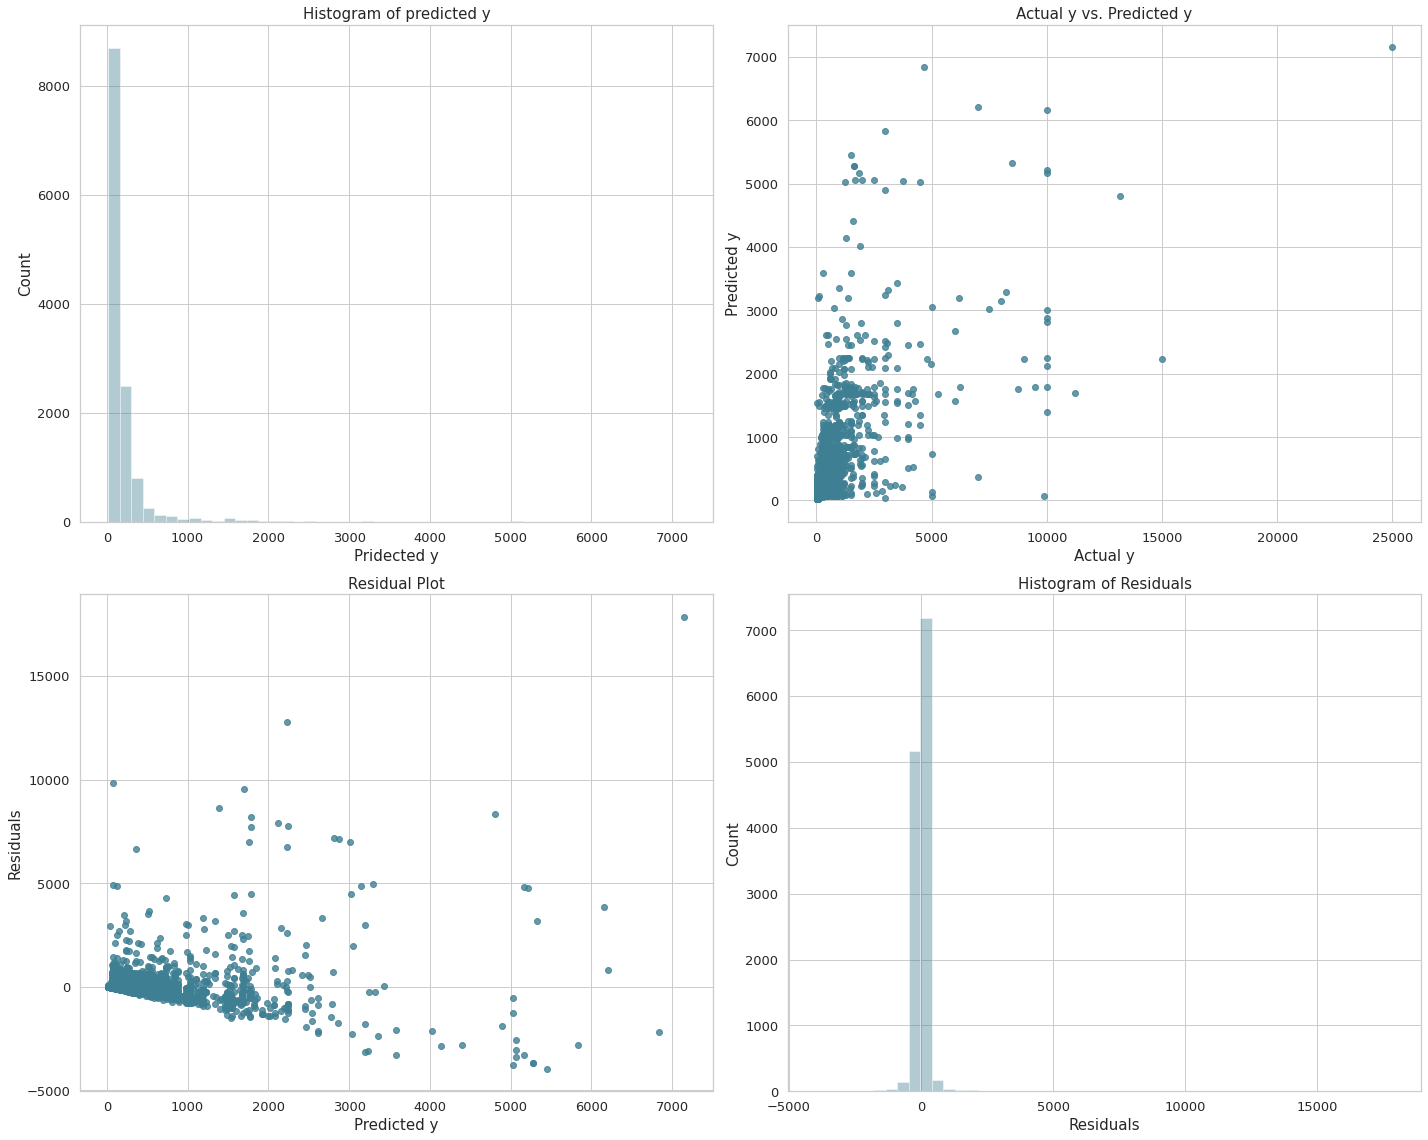

Model: Linear
Best Params: {}
MSE is:  4.946034114813375e+28
RMSE is:  222396810112316.47


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


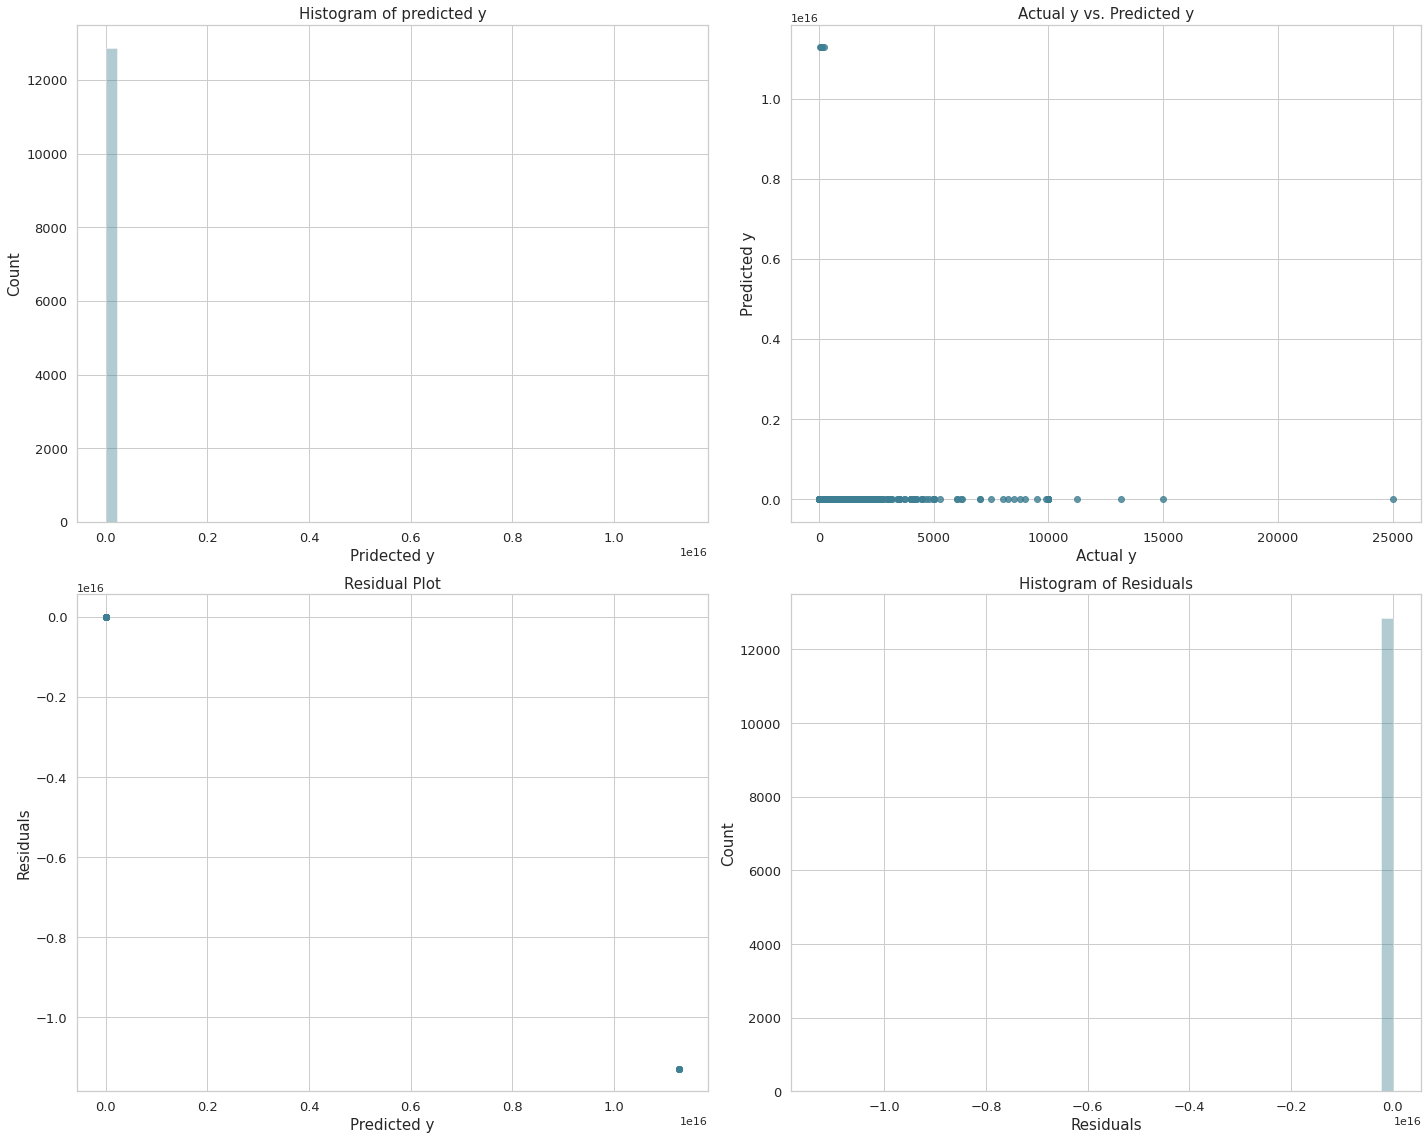

Model: Ridge
Best Params: {'ridge__alpha': 900}
MSE is:  225186.64578102328
RMSE is:  474.53835016890184


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


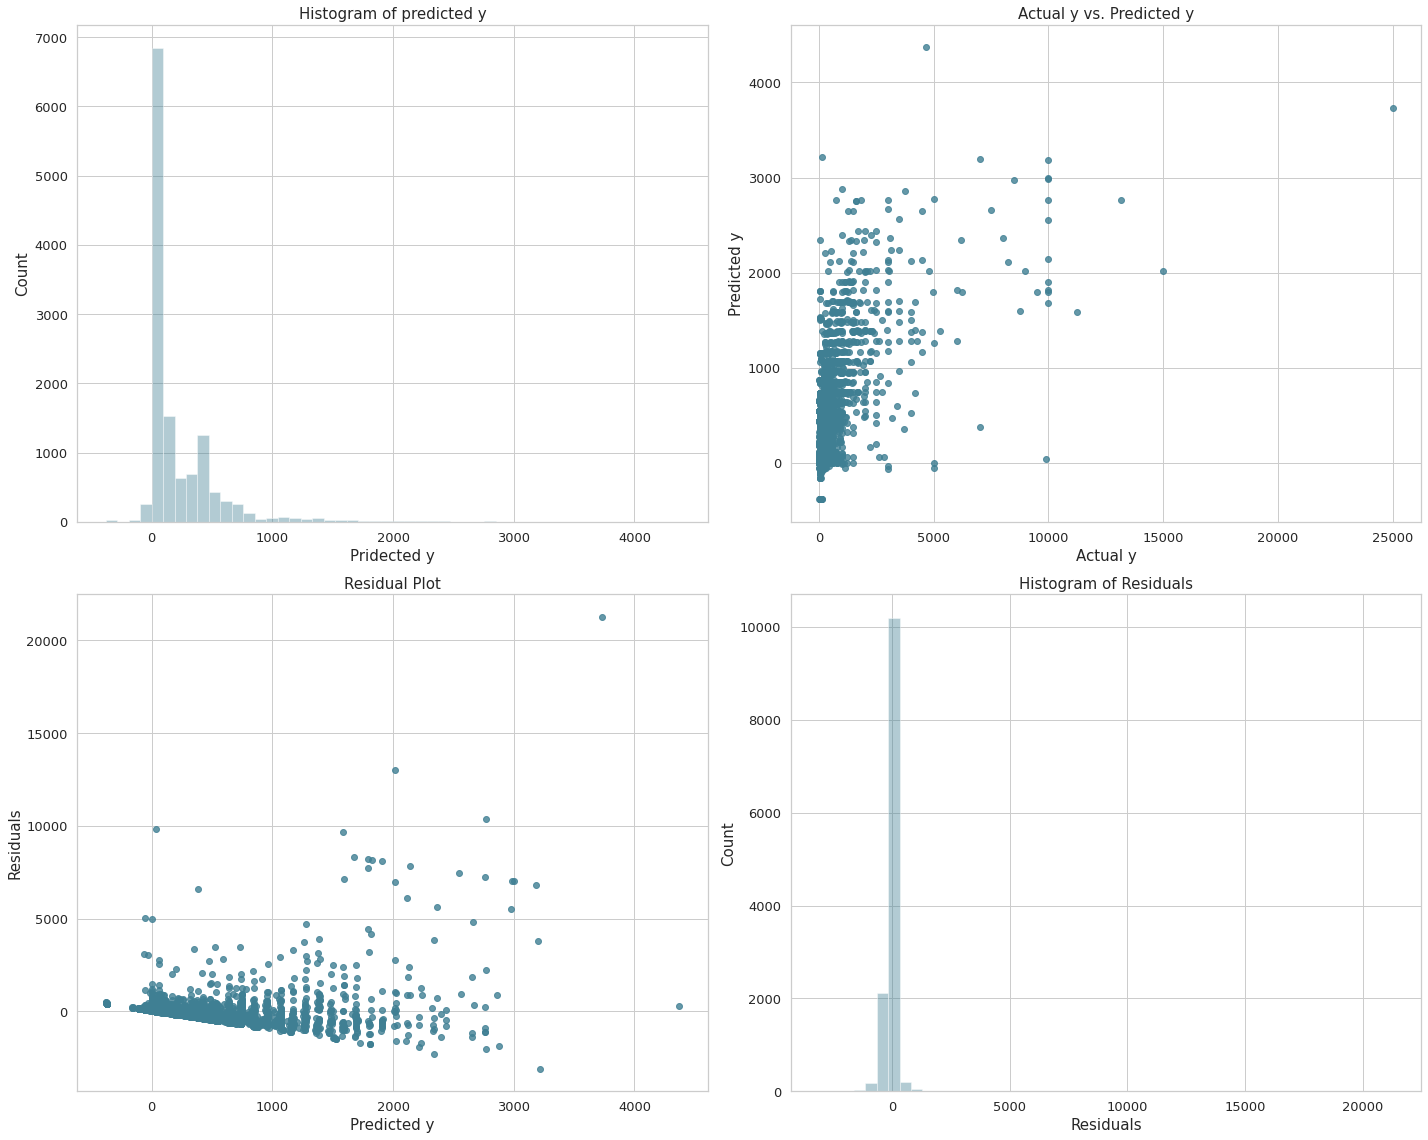

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 870994186.6203616, tolerance: 756616.3353707024
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 800464160.0565367, tolerance: 782067.1642075066
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 885619081.8806806, tolerance: 656439.1249396077
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332308436.00

Model: Lasso
Best Params: {'lasso__alpha': 0.1}
MSE is:  225094.35302801308
RMSE is:  474.44109542493584


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


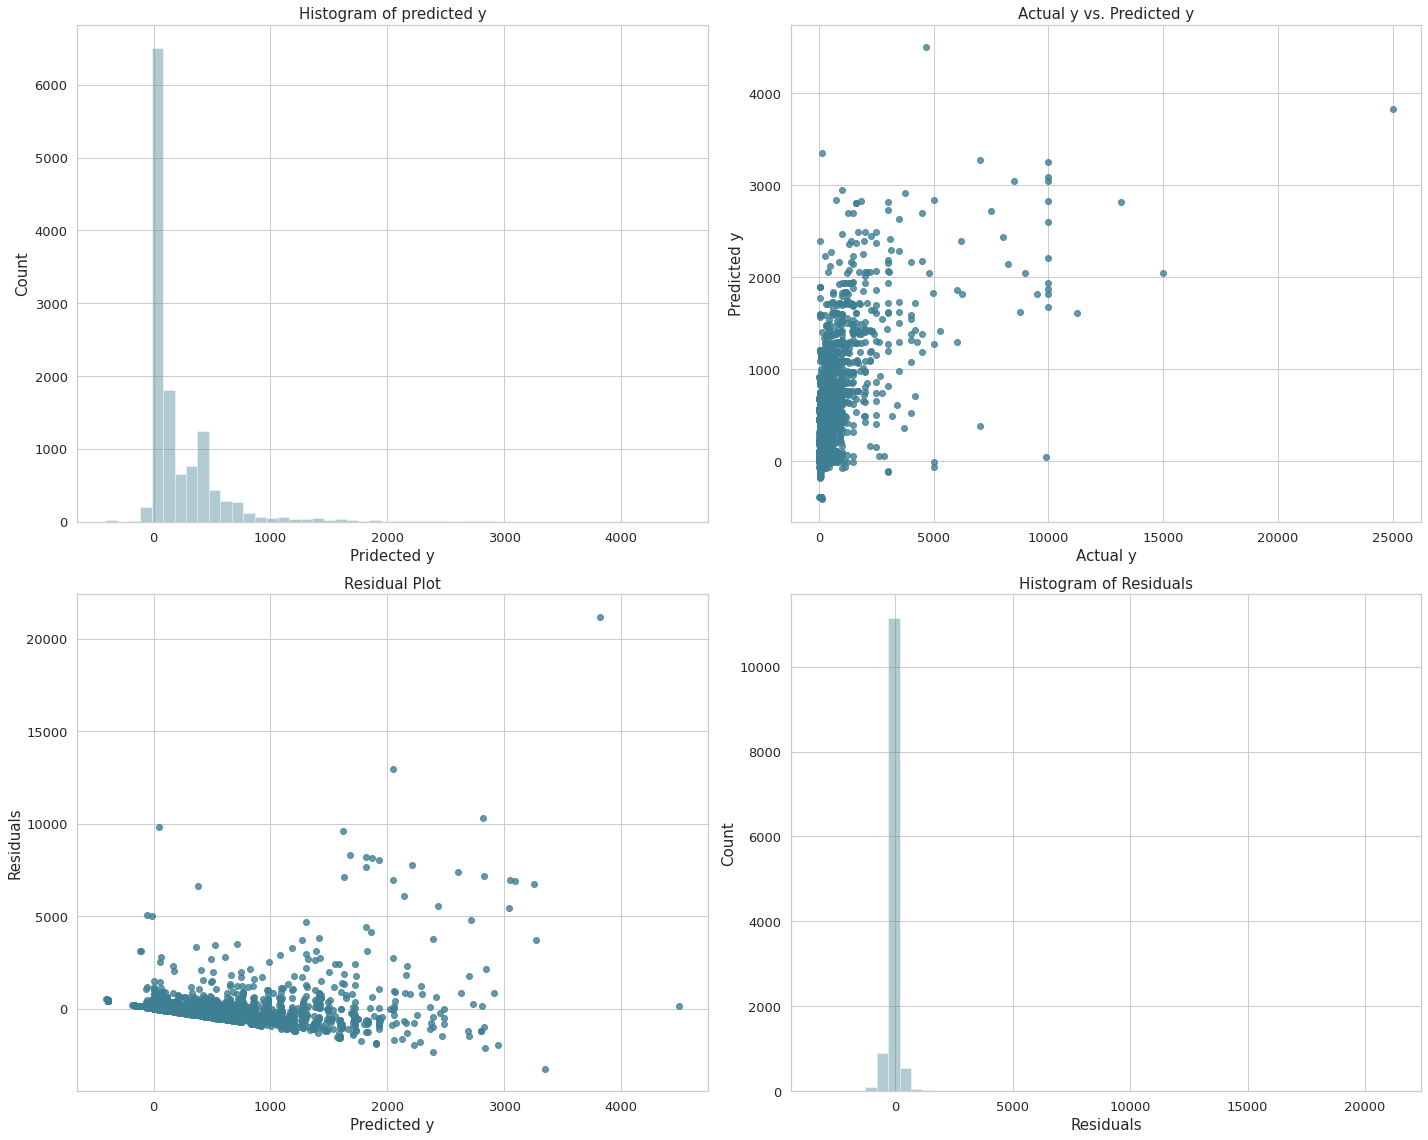

Model: RandomForest
Best Params: {'rf__max_depth': 10, 'rf__n_estimators': 30}
MSE is:  181959.37300983054
RMSE is:  426.56696192957855


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


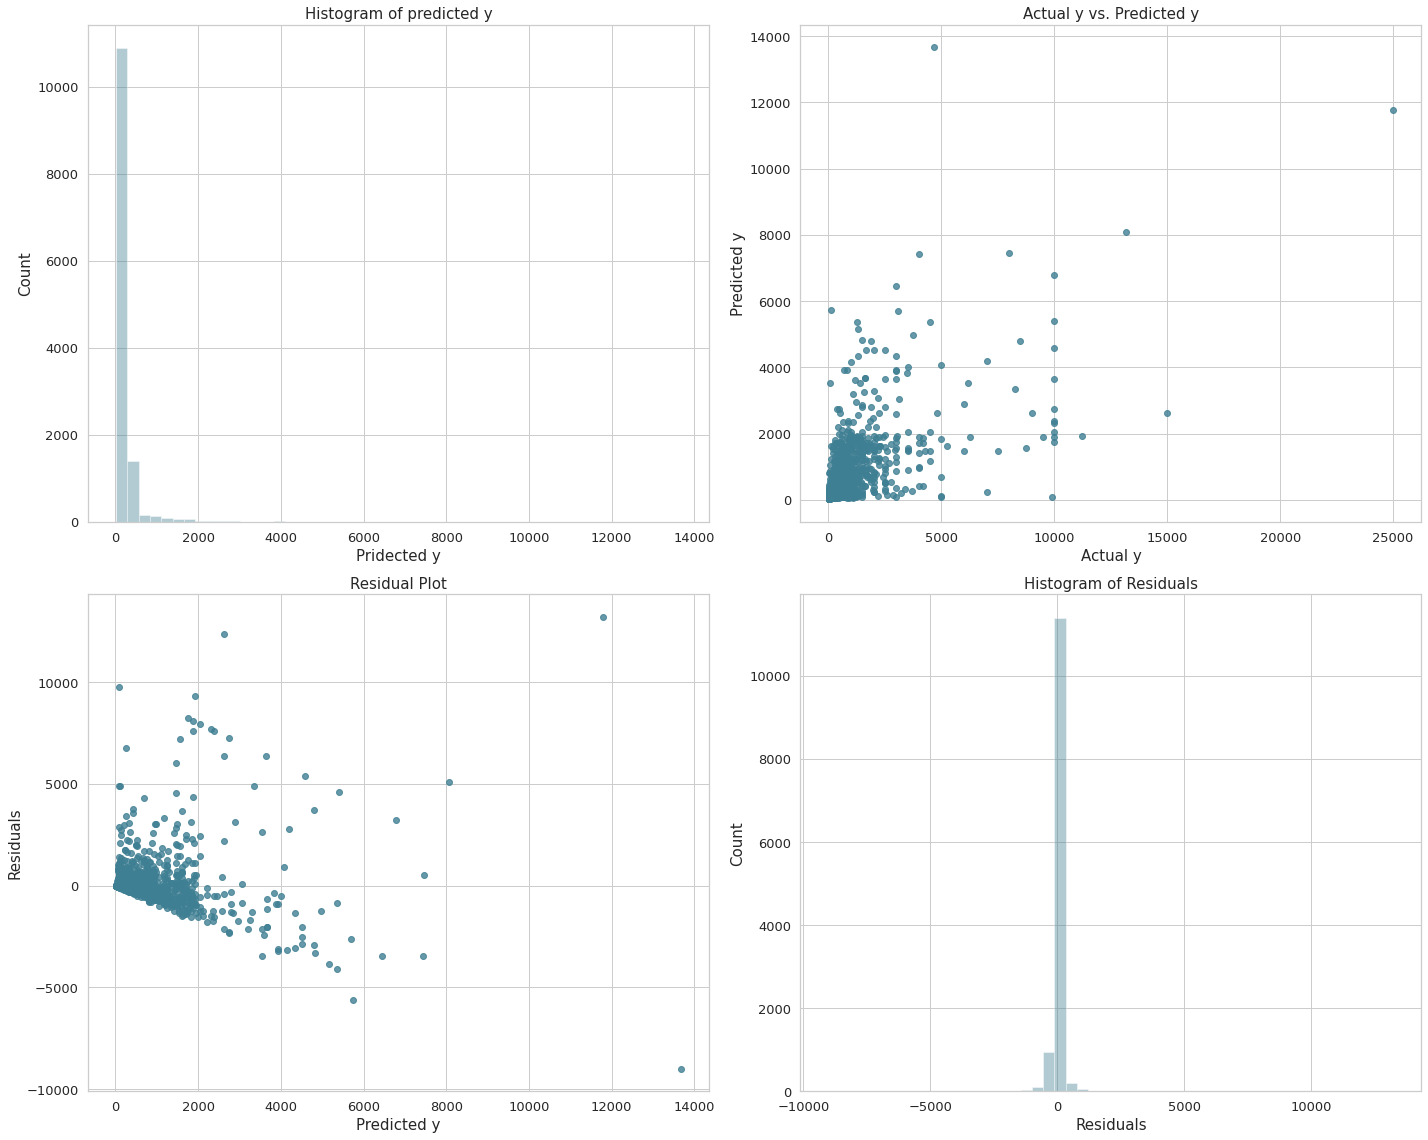

{'KNN': 436.3715058053069,
 'Lasso': 474.44109542493584,
 'Linear': 222396810112316.47,
 'RandomForest': 426.56696192957855,
 'Ridge': 474.53835016890184}

In [55]:
y = df['price'].to_numpy()
modelRmse_add_property_type = {}

def try_all_models(X, y):
    for model_name in Selected_Models:
        y_test, y_pred, rmse = model(model_name, X, y)
        modelRmse_add_property_type[model_name] = rmse
    return modelRmse_add_property_type

try_all_models(X, y)

### Results before adding property_type when target column is price:
    {'KNN': 445.84215879524425,
     'Lasso': 486.90628234375055,
     'Linear': 486.7448221763195,
     'RandomForest': 448.7516238036578,
     'Ridge': 486.87816528257343}
     
### Results after adding propert_type when target column is price:
    {'KNN': 436.3715058053069,
     'Lasso': 474.44109542493584,
     'Linear': 222396810112316.47,
     'RandomForest': 426.56696192957855,
     'Ridge': 474.53835016890184}
     
### Adding property type does improve KNN, Lasso and Random Forest results. Ridge performed slightly better.

### Checking with logPrice

Model: KNN
Best Params: {'knn__n_neighbors': 47}
MSE is:  0.2885787918058711
RMSE is:  0.5371953013624292


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


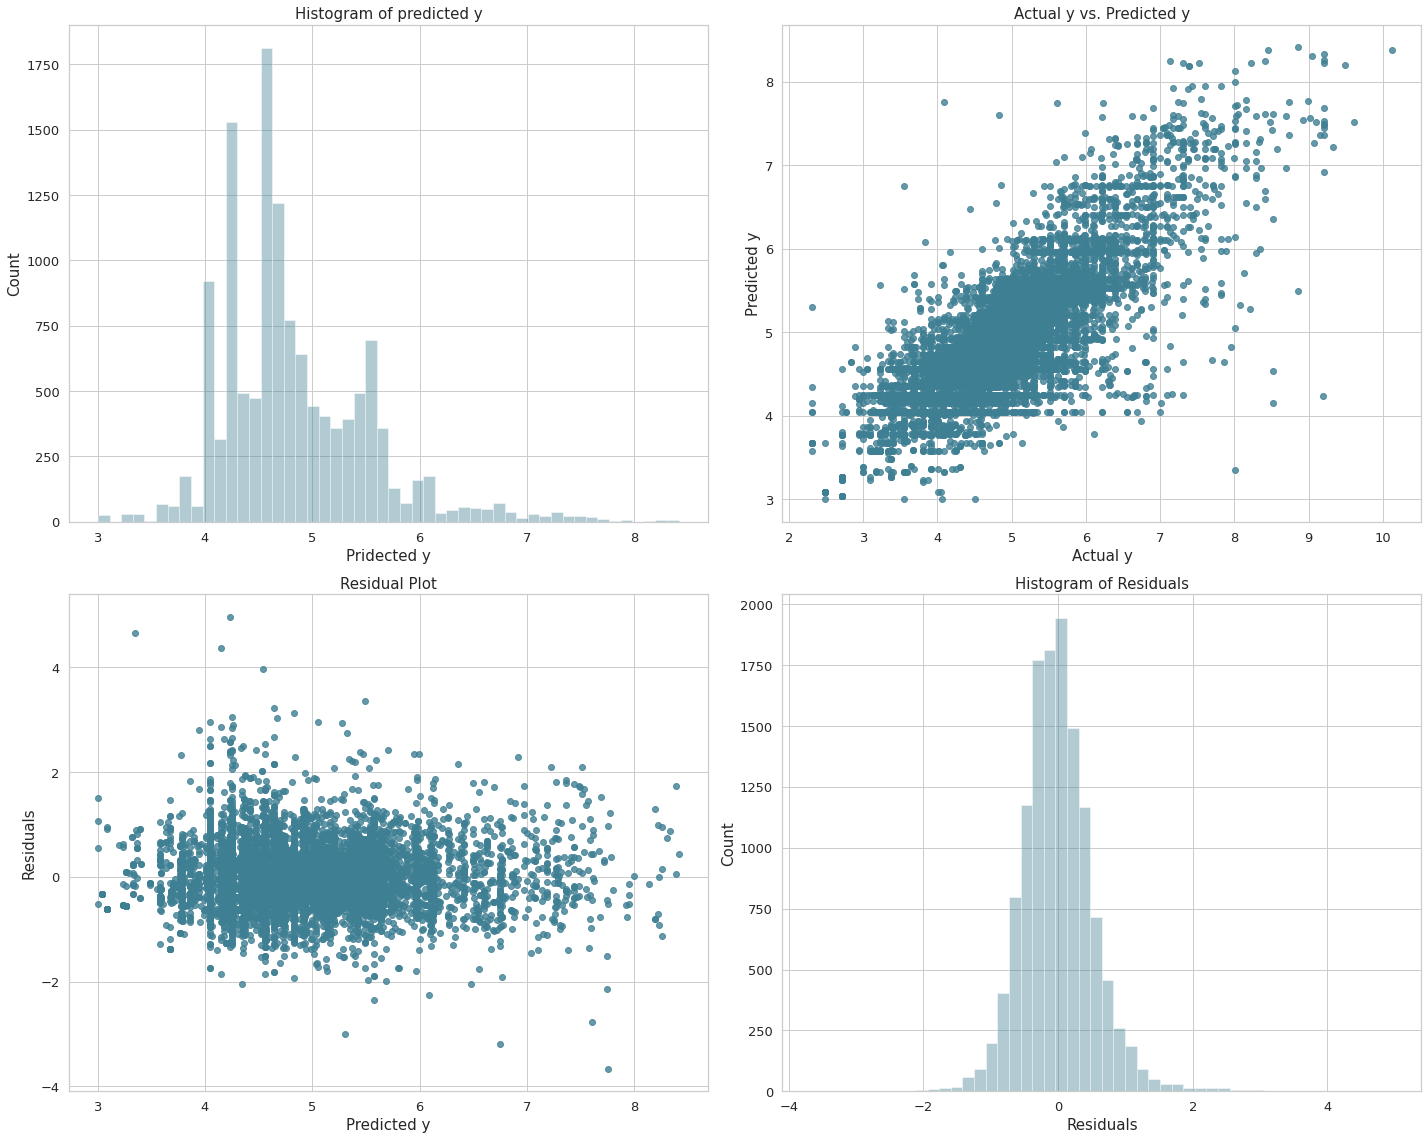

Model: Linear
Best Params: {}
MSE is:  2.262382470346504e+22
RMSE is:  150412182696.2997


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


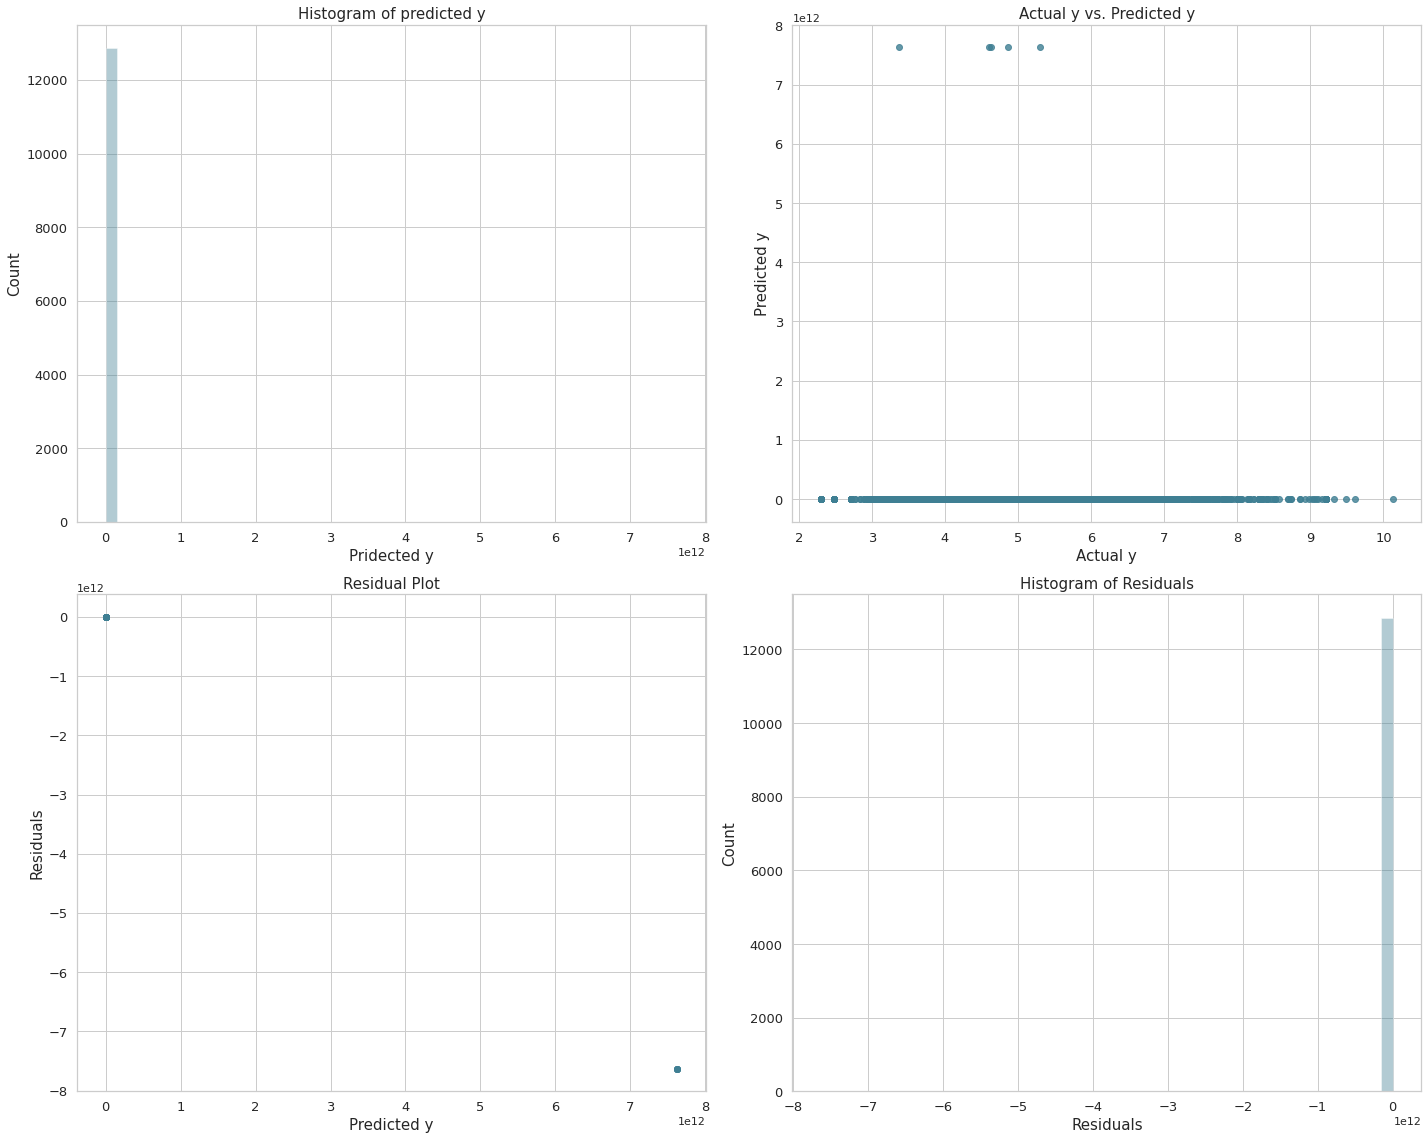

Model: Ridge
Best Params: {'ridge__alpha': 100}
MSE is:  0.35899449160653035
RMSE is:  0.5991614904235171


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


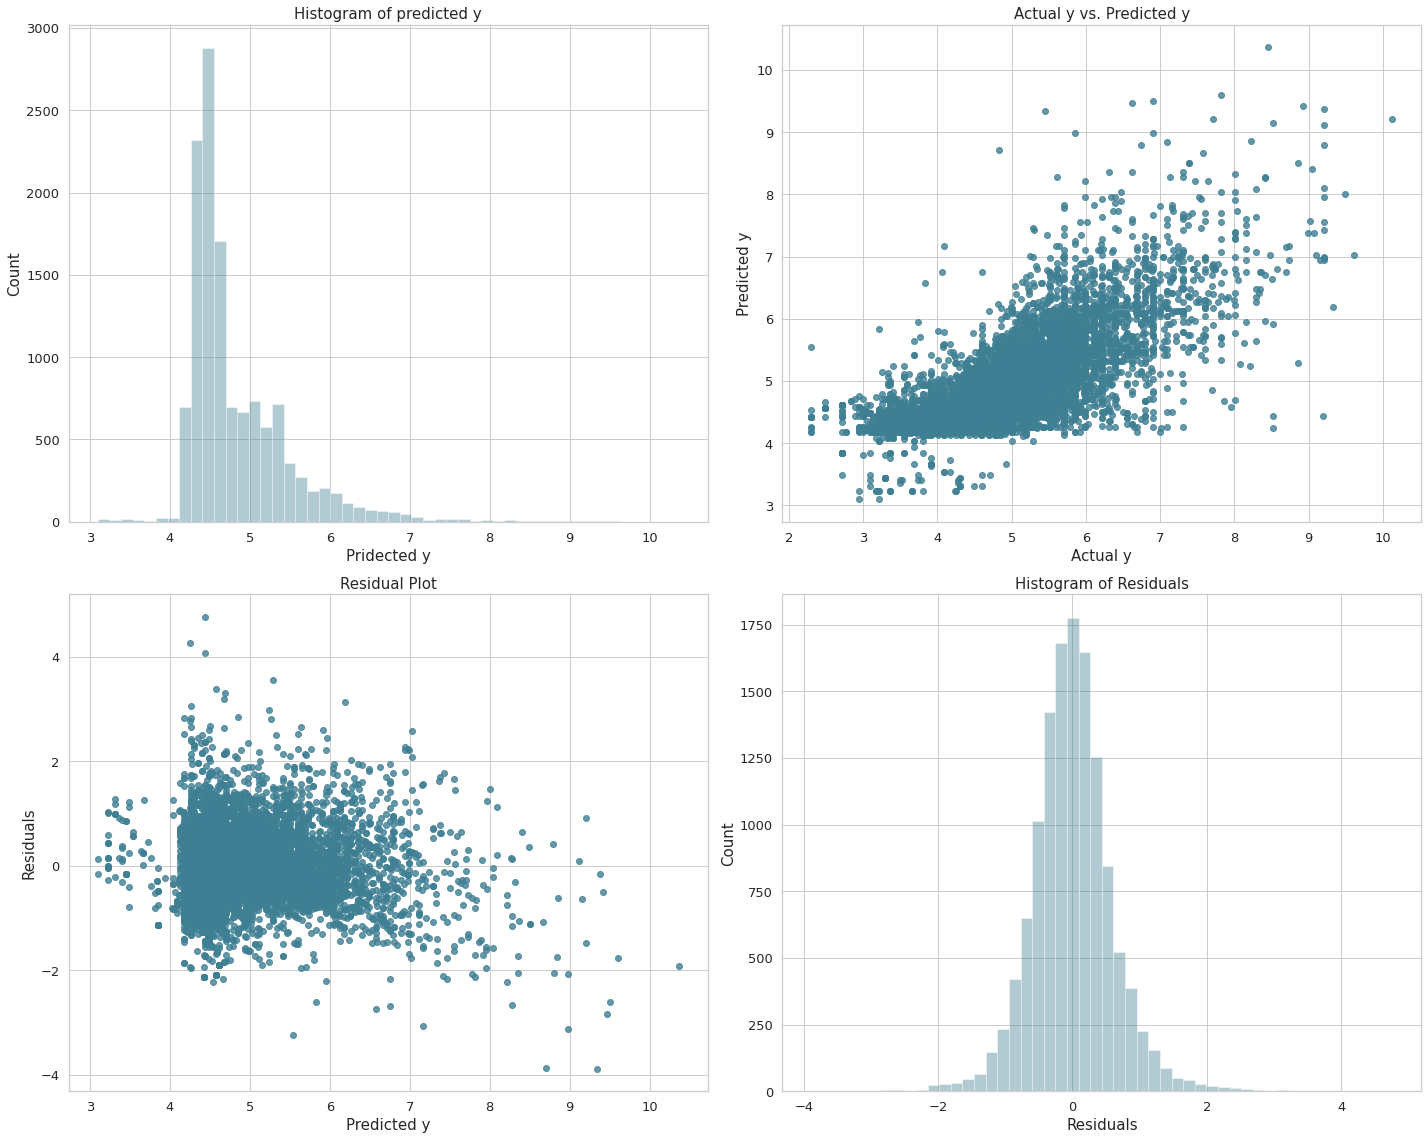

Model: Lasso
Best Params: {'lasso__alpha': 0.0001}
MSE is:  0.3588988850638198
RMSE is:  0.59908170149306


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


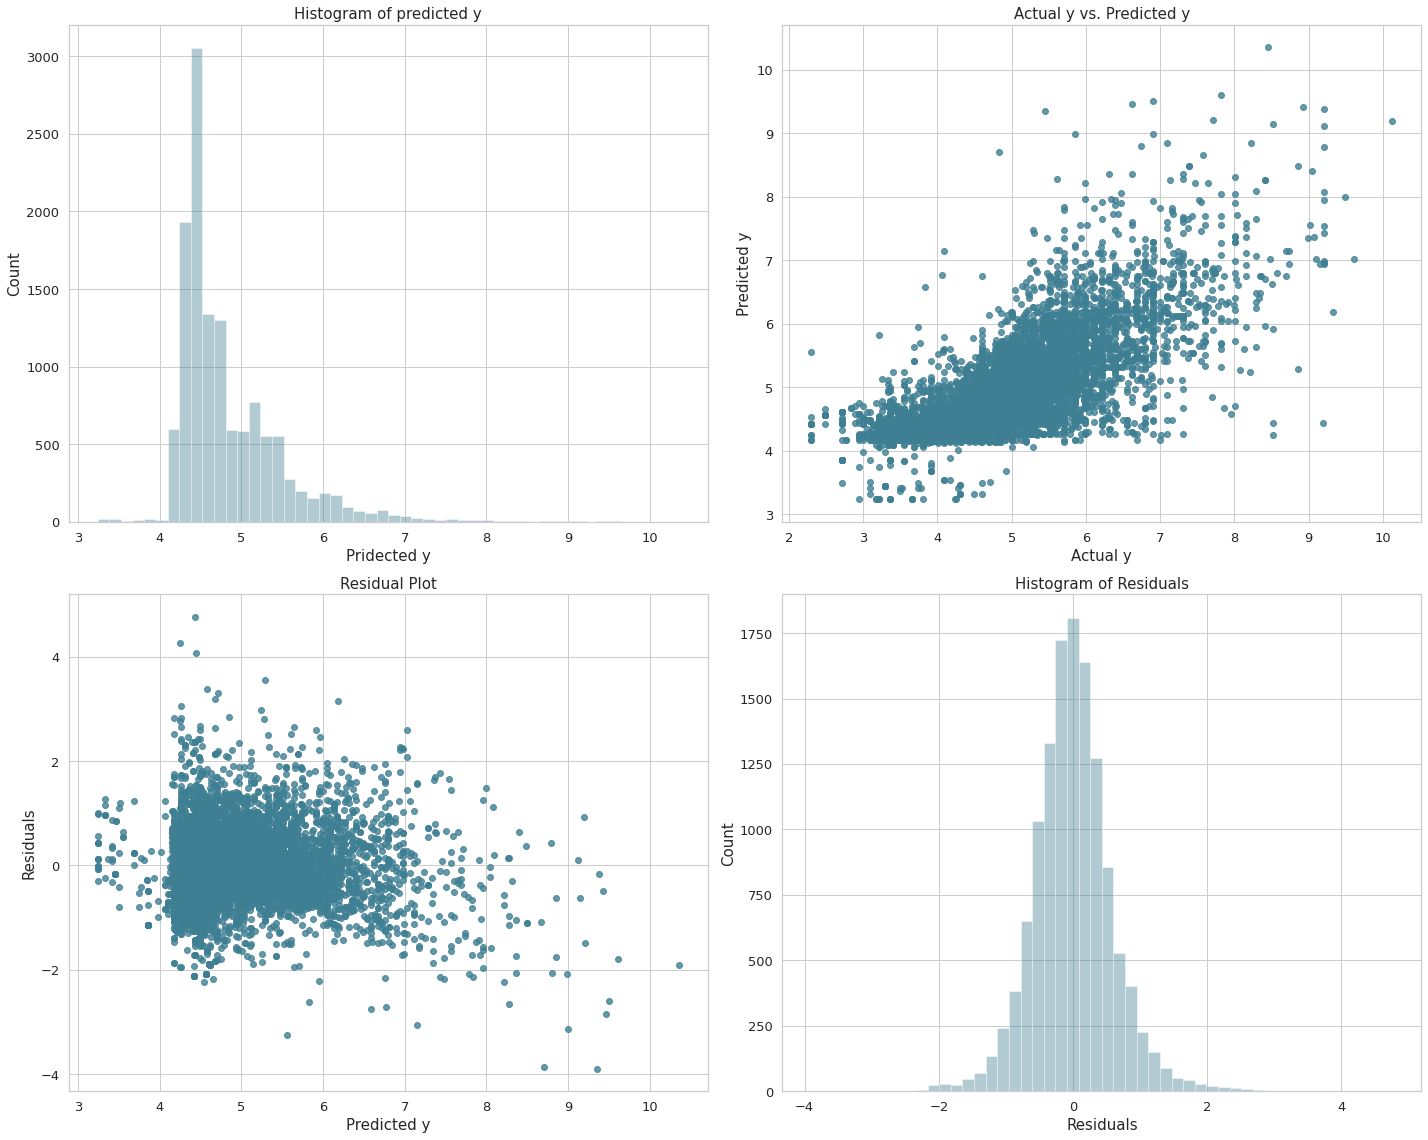

Model: RandomForest
Best Params: {'rf__max_depth': 10, 'rf__n_estimators': 90}
MSE is:  0.279120294207146
RMSE is:  0.5283183644424506


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


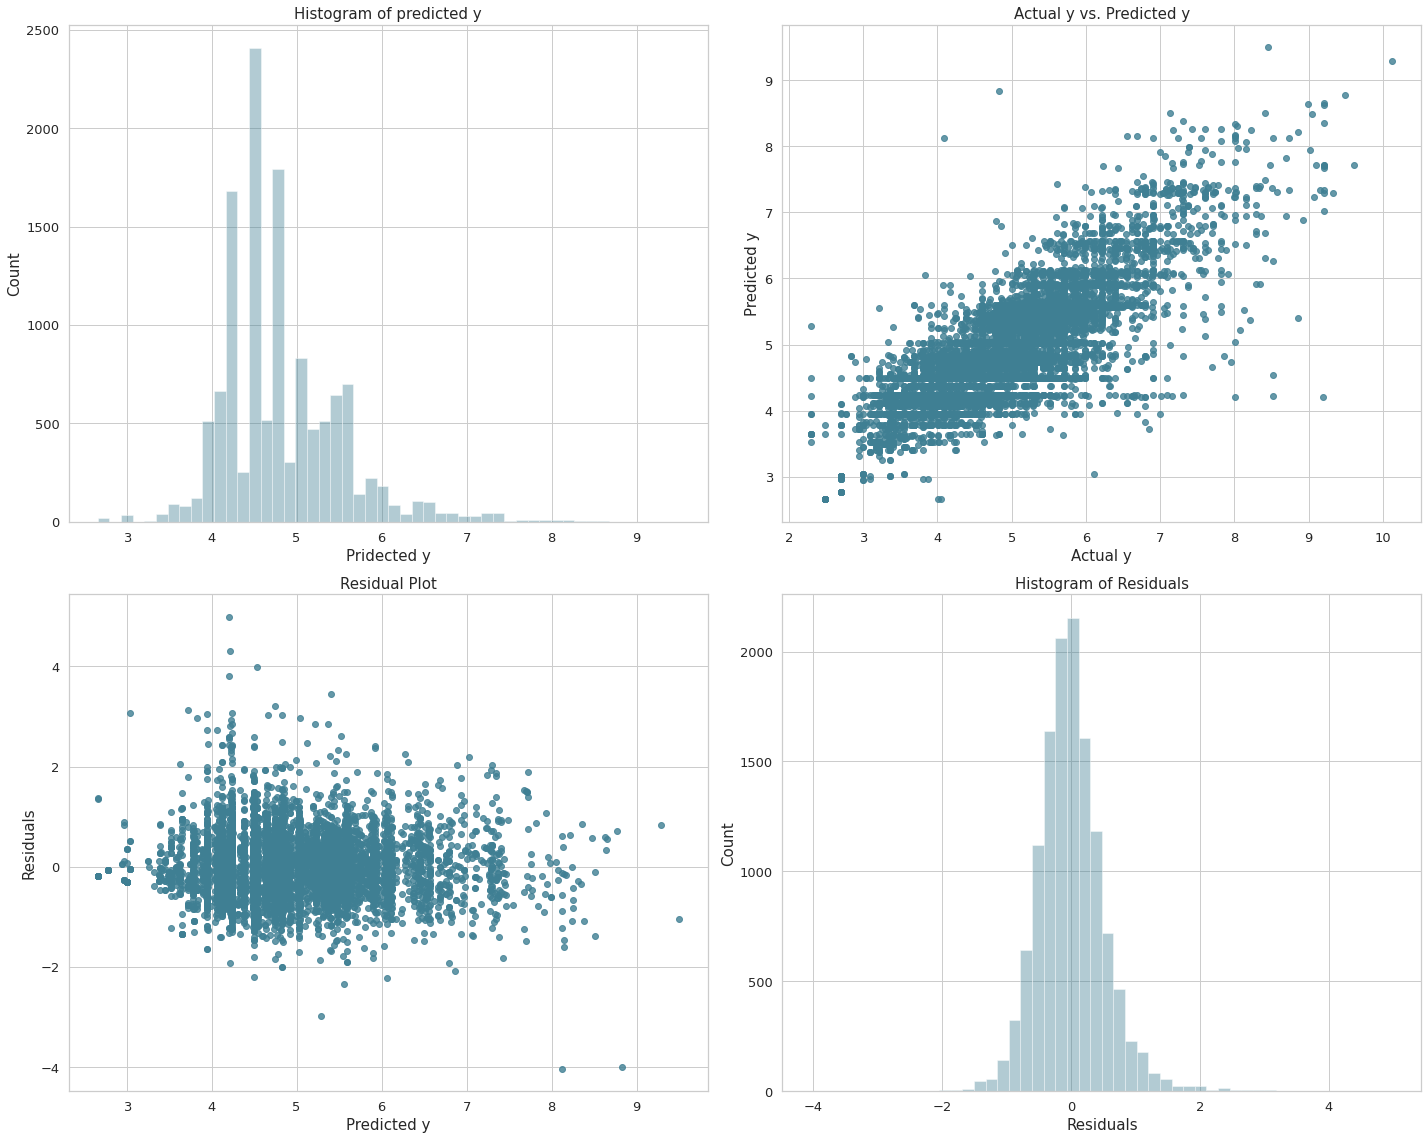

{'KNN': 0.5371953013624292,
 'Lasso': 0.59908170149306,
 'Linear': 150412182696.2997,
 'RandomForest': 0.5283183644424506,
 'Ridge': 0.5991614904235171}

In [57]:
X = df_add_property_type.to_numpy()
y = df['logPrice'].to_numpy()
modelRmse_add_property_type_log = {}

def try_all_models(X, y):
    for model_name in Selected_Models:
        y_test, y_pred, rmse = model(model_name, X, y)
        modelRmse_add_property_type_log[model_name] = rmse
    return modelRmse_add_property_type_log

try_all_models_log(X, y)

### Results before adding propert_type when target column is logPrice:
    {'KNN': 0.5584011474814095,
     'Lasso': 0.6191547496755939,
     'Linear': 0.619155177321895,
     'RandomForest': 0.5469752018405204,
     'Ridge': 0.6191558480248383}
     
### Results after adding propert_type when target column is logPrice:
    {'KNN': 0.5371953013624292,
     'Lasso': 0.59908170149306,
     'Linear': 150412182696.2997,
     'RandomForest': 0.5283183644424506,
     'Ridge': 0.5991614904235171}
     
### Adding property type does improve KNN, Lasso and Random Forest results. Ridge performed slightly better.

## Using logPrice results in higher normal distribution, so going forward I will be using only logPrice as target

# Adding Neighborhood

In [58]:
df_neighbourhood_cleansed = pd.get_dummies(df['neighbourhood_cleansed'], prefix = 'neighbourhood_cleansed')
df_neighbourhood_cleansed.head()

neighbourhood_cleansed_0  neighbourhood_cleansed_1  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   neighbourhood_cleansed_2  neighbourhood_cleansed_3  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   neighbourhood_cleansed_4  neighbourhood_cleansed_5  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   neighbourhood_cleansed_6  neighbourhood_cleansed_7  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   neighbourhood_cleansed_8  neighbourhood_cleansed_9  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   neighbourhood_cleansed_10  neighbourhood_cleansed_11  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   neighbourhood_cleansed_12  neighbourhood_cleansed_13  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   neighbourhood_cleansed_14  neighbourhood_cleansed_15  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   neighbourhood_cleansed_16  neighbourhood_cleansed_17  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   neighbourhood_cleansed_18  neighbourhood_cleansed_19  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   neighbourhood_cleansed_20  neighbourhood_cleansed_21  ...  \
0                          0                          0  ...   
1                          0                          0  ...   
2                          0                          0  ...   
3                          0                          0  ...   
4                          0                          0  ...   

   neighbourhood_cleansed_241  neighbourhood_cleansed_242  \
0                           0                           0   
1     

In [59]:
df_property_neighborhood = pd.concat([df[['accommodates', 'bathrooms', 'bedrooms']], df_property_type, df_neighbourhood_cleansed], axis = 1)
X = df_property_neighborhood.to_numpy()

Since using logPrice is giving more normalized results in all the models above. So going further I will be using only logPrice as the target feature

## Checking with logPrice column

Model: KNN
Best Params: {'knn__n_neighbors': 6}
MSE is:  0.2571823434293472
RMSE is:  0.5071314853461055


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


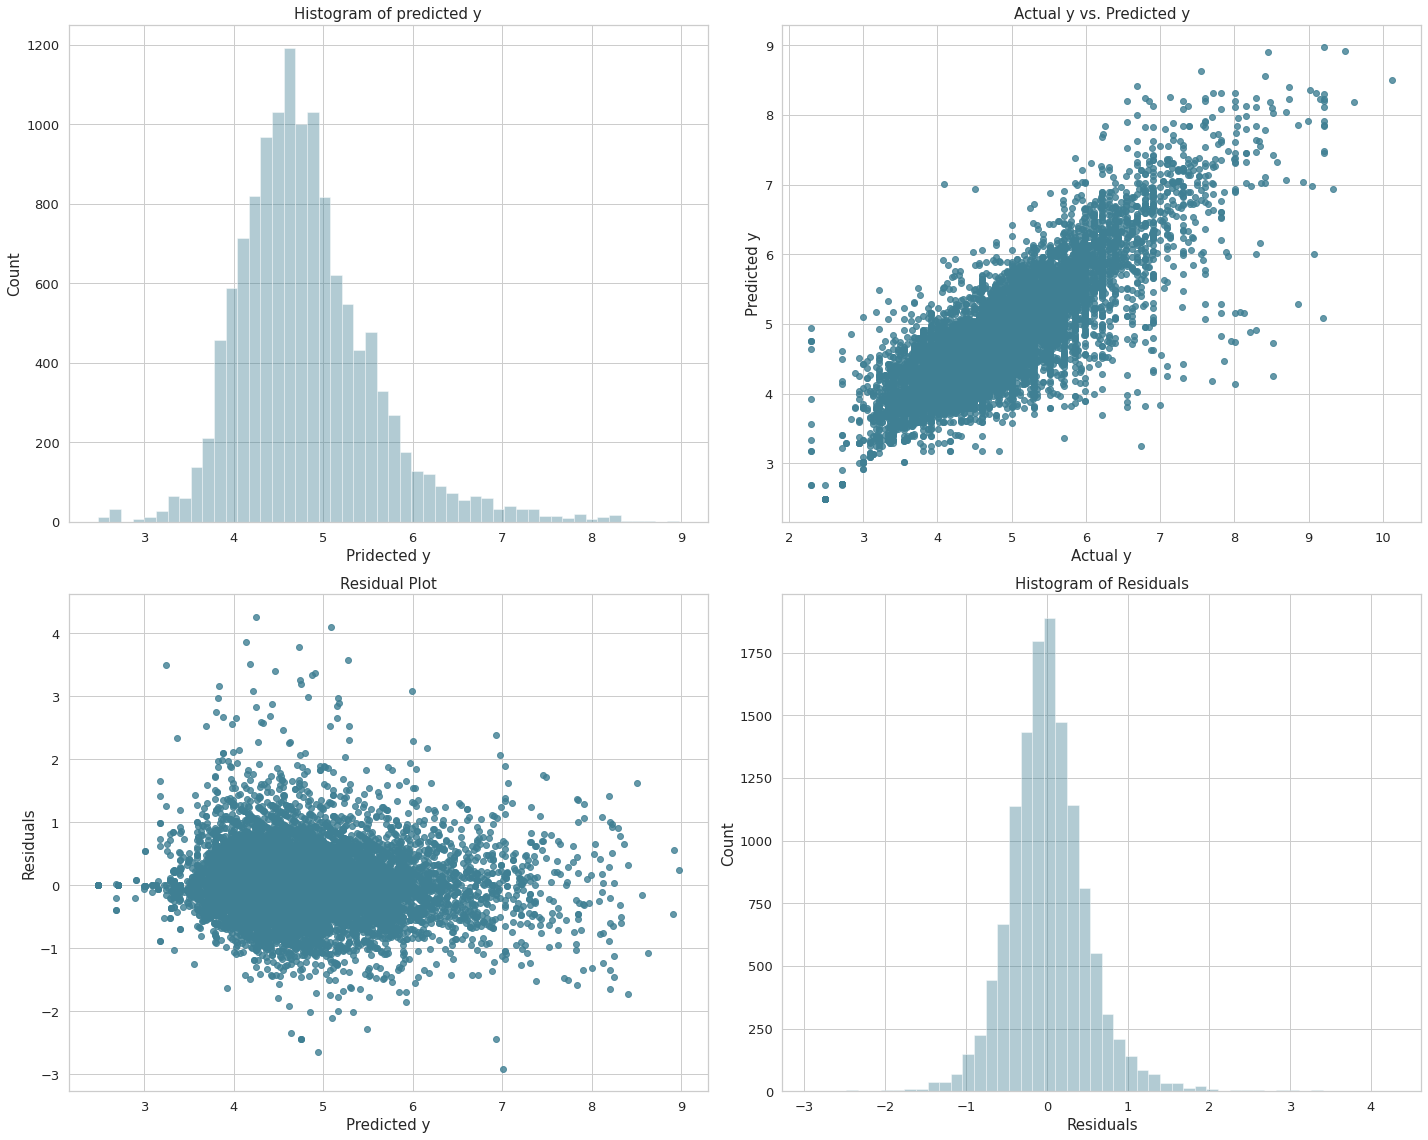

Model: Linear
Best Params: {}
MSE is:  1.1744870786766643e+22
RMSE is:  108373755064.43727


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


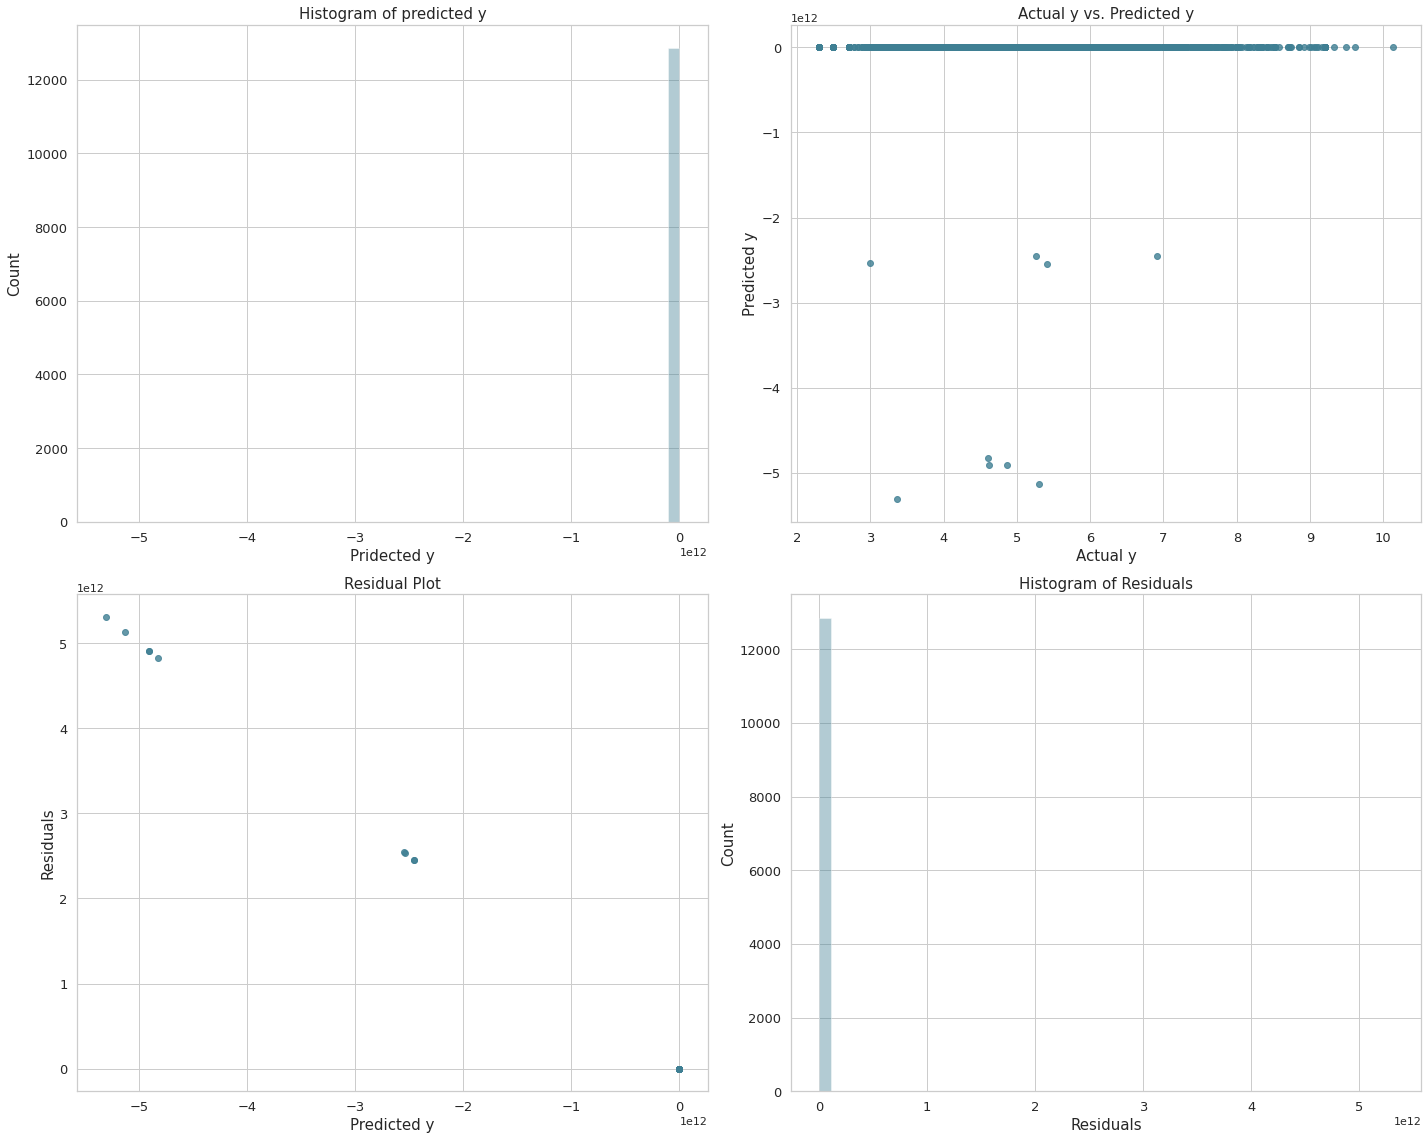

Model: Ridge
Best Params: {'ridge__alpha': 400}
MSE is:  0.2683310383819314
RMSE is:  0.5180067937604017


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


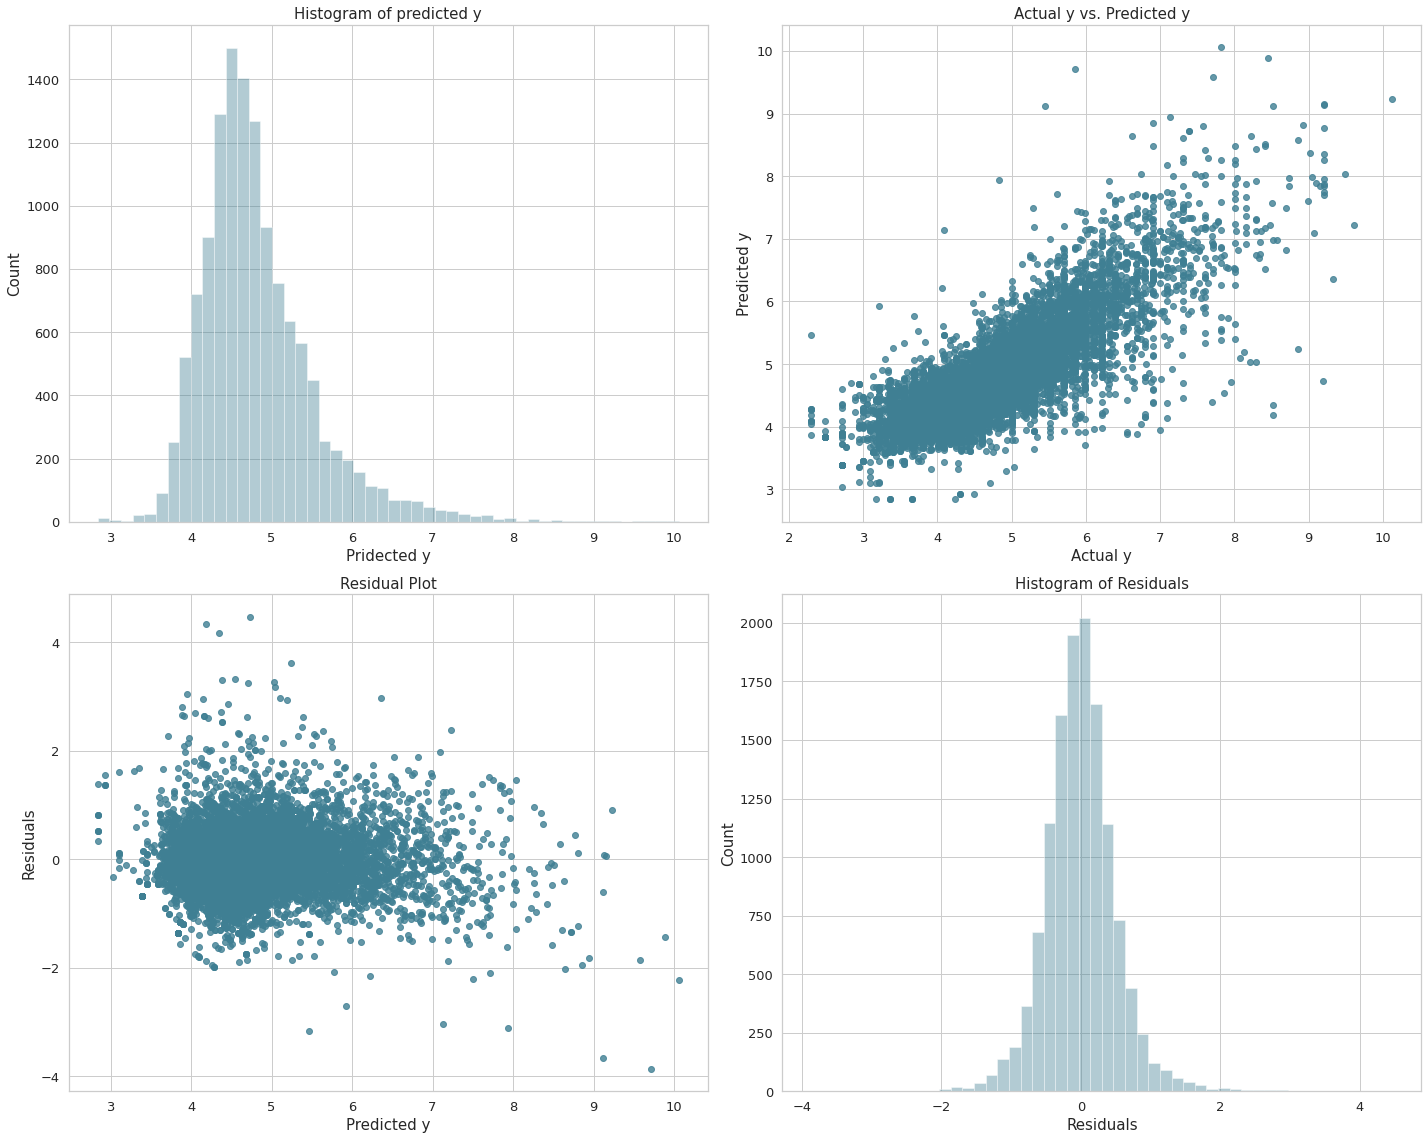

Model: Lasso
Best Params: {'lasso__alpha': 0.0001}
MSE is:  0.2686572757482234
RMSE is:  0.5183215949082417


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


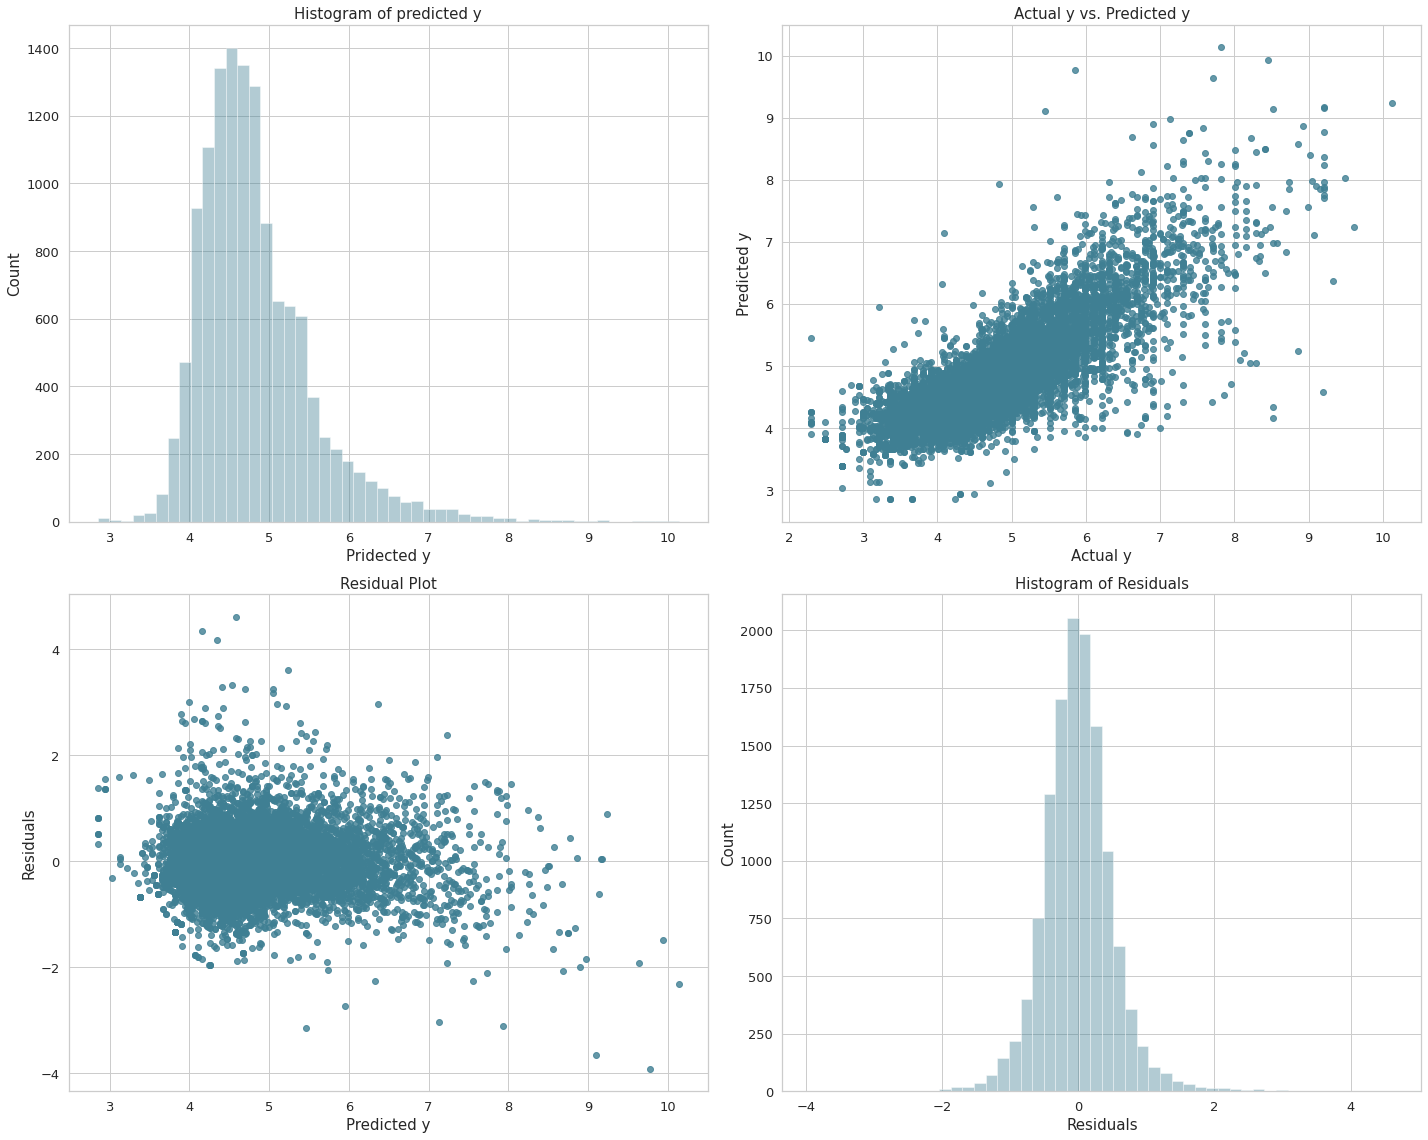

Model: RandomForest
Best Params: {'rf__max_depth': 50, 'rf__n_estimators': 90}
MSE is:  0.22663609210640934
RMSE is:  0.4760631177757938


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


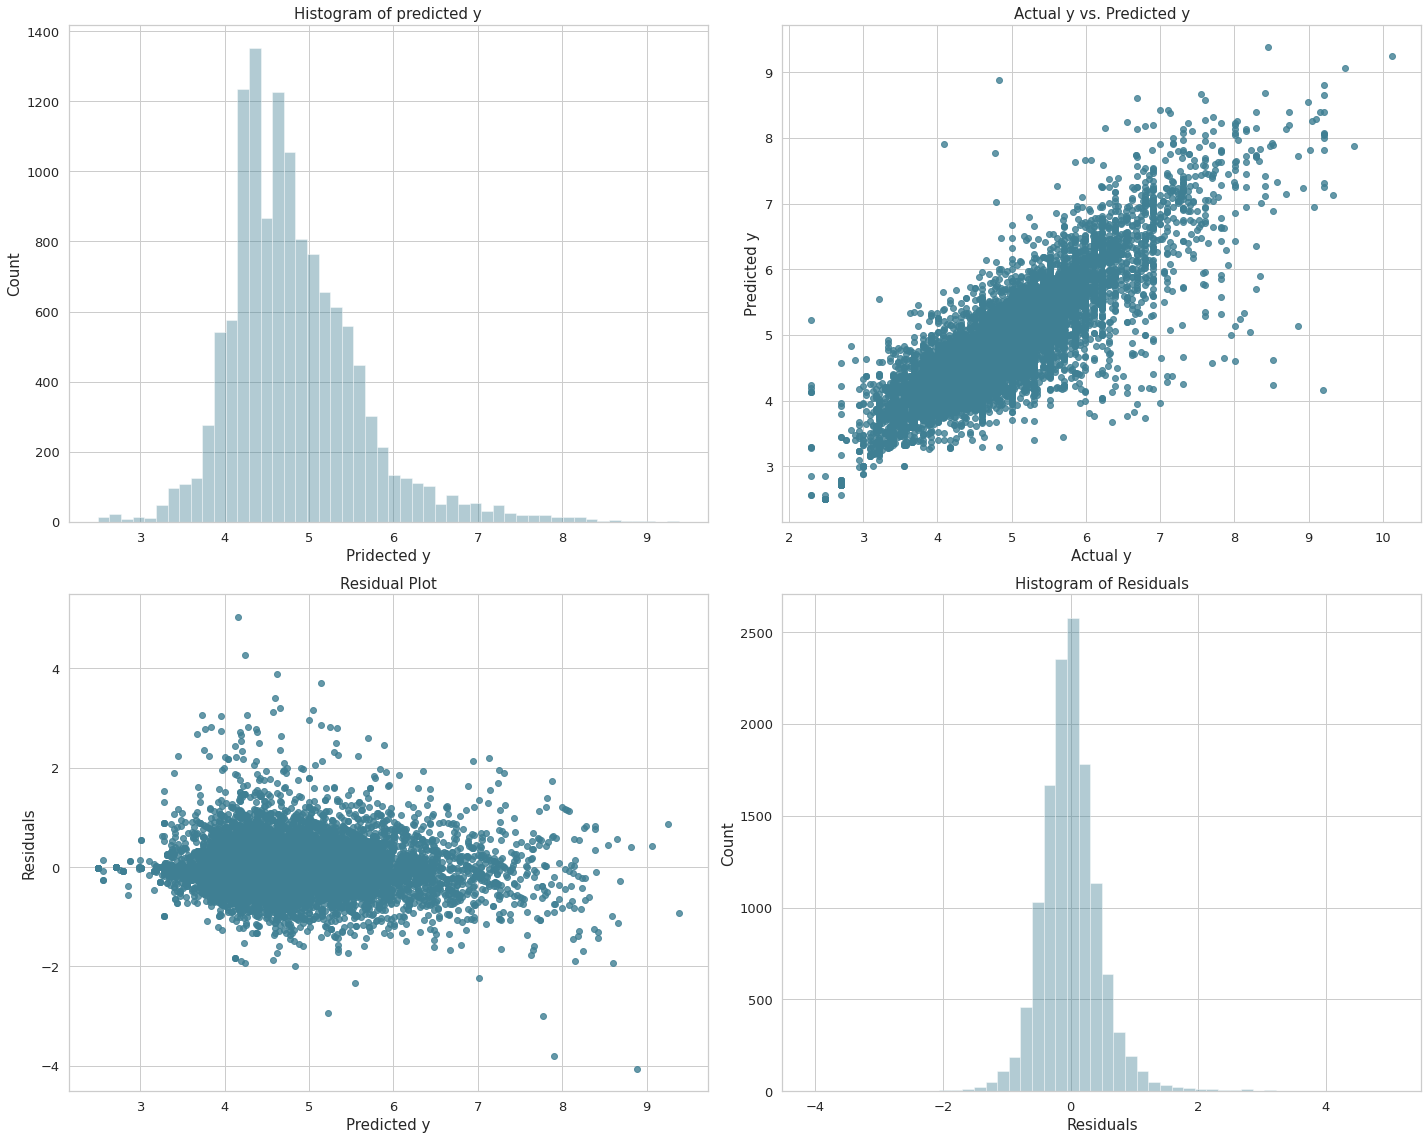

{'KNN': 0.5071314853461055,
 'Lasso': 0.5183215949082417,
 'Linear': 108373755064.43727,
 'RandomForest': 0.4760631177757938,
 'Ridge': 0.5180067937604017}

In [60]:
y = df['logPrice'].to_numpy()
modelRmse_property_neighborhood = {}

def try_all_models(X, y):
    for model_name in Selected_Models:
        y_test, y_pred, rmse = model(model_name, X, y)
        modelRmse_property_neighborhood[model_name] = rmse
    return modelRmse_property_neighborhood

try_all_models(X, y)

### Results before adding neighborhood when target column is logPrice:
    {'KNN': 0.5584011474814095,
     'Lasso': 0.6191547496755939,
     'Linear': 0.619155177321895,
     'RandomForest': 0.5469752018405204,
     'Ridge': 0.6191558480248383}
     
### Results after adding neighborhood when target column is logPrice:
    {'KNN': 0.5371953013624292,
     'Lasso': 0.59908170149306,
     'Linear': 150412182696.2997,
     'RandomForest': 0.5283183644424506,
     'Ridge': 0.5991614904235171}
     
### Adding property type does improve KNN, Lasso and Random Forest results. Ridge performed slightly better.

# Adding amenities

In [60]:
df_X = pd.concat([df[['accommodates', 'bathrooms', 'bedrooms', 
                                          'check_in_24h', 'air_conditioning', 'bbq', 'balcony', 'bed_linen',
                                          'breakfast', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods',
                                          'elevator', 'gym', 'child_friendly', 'parking', 'outdoor_space',
                                          'host_greeting', 'hot_tub_sauna_or_pool', 'internet', 'long_term_stays',
                                          'pets_allowed', 'private_entrance', 'refrigerator', 'secure',
                                          'self_check_in']], 
                                      df_property_type, df_neighbourhood_cleansed], axis = 1)
X = df_X.to_numpy()

Model: KNN
Best Params: {'knn__n_neighbors': 7}
MSE is:  0.3004023822790286
RMSE is:  0.54808975750239


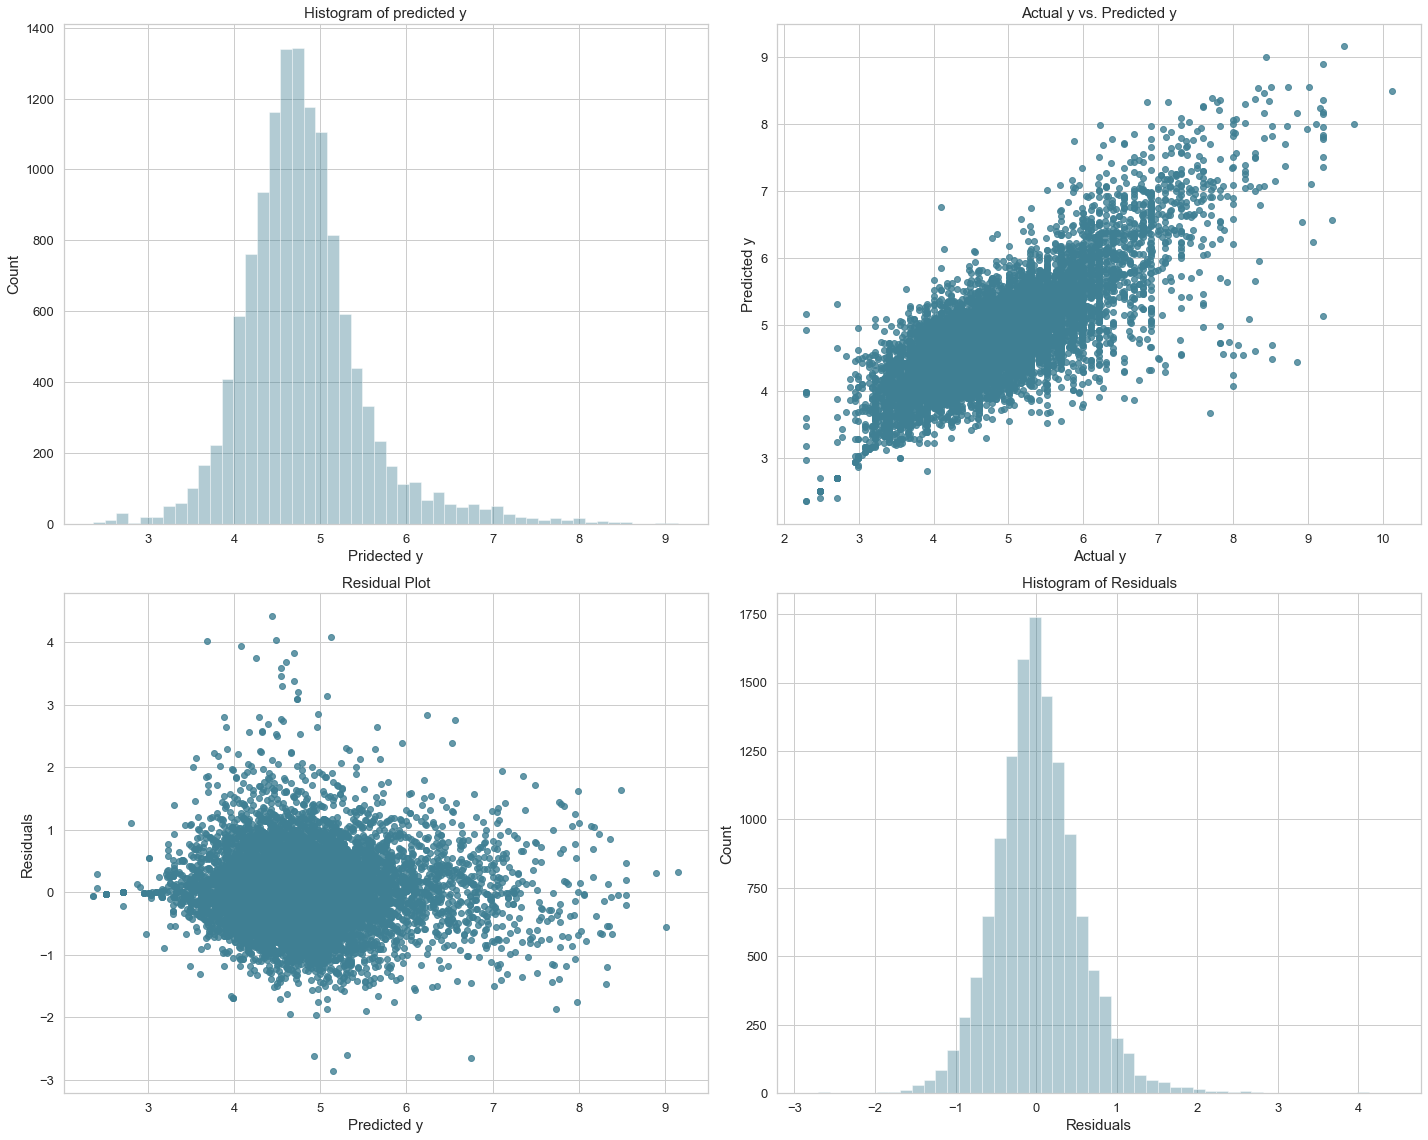

Model: Linear
Best Params: {}
MSE is:  1.2651172108059896e+22
RMSE is:  112477429327.22057


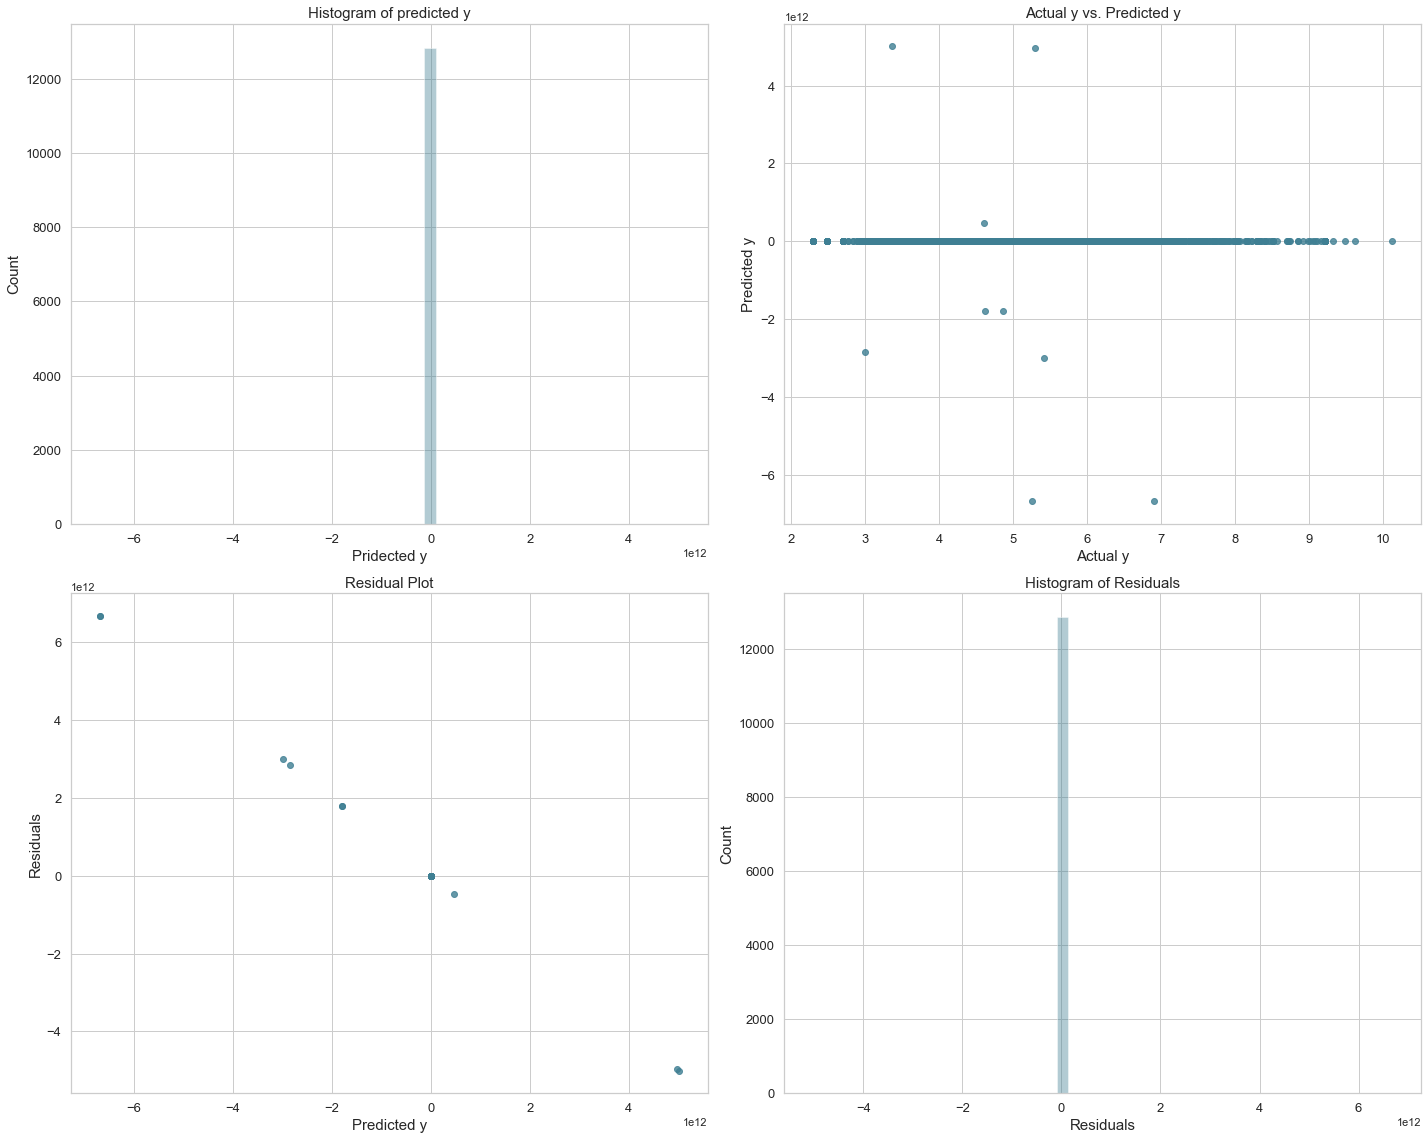

Model: Ridge
Best Params: {'ridge__alpha': 400}
MSE is:  0.2460695150075807
RMSE is:  0.49605394364683836


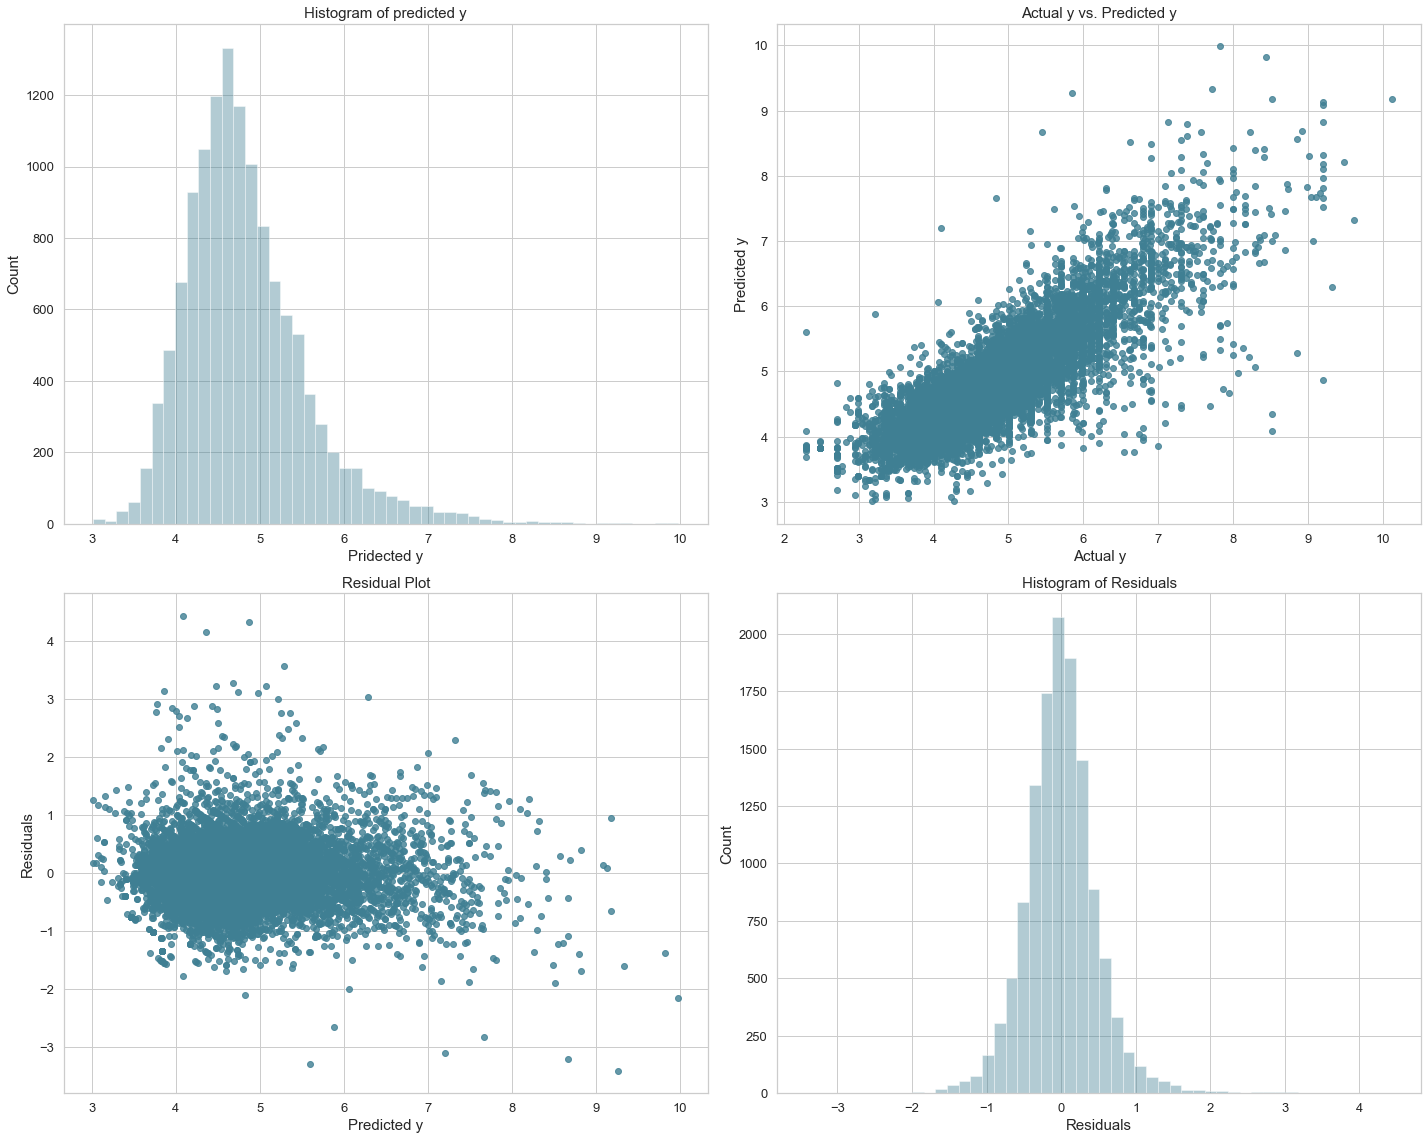

Model: Lasso
Best Params: {'lasso__alpha': 0.0001}
MSE is:  0.24633640628090933
RMSE is:  0.4963228851069728


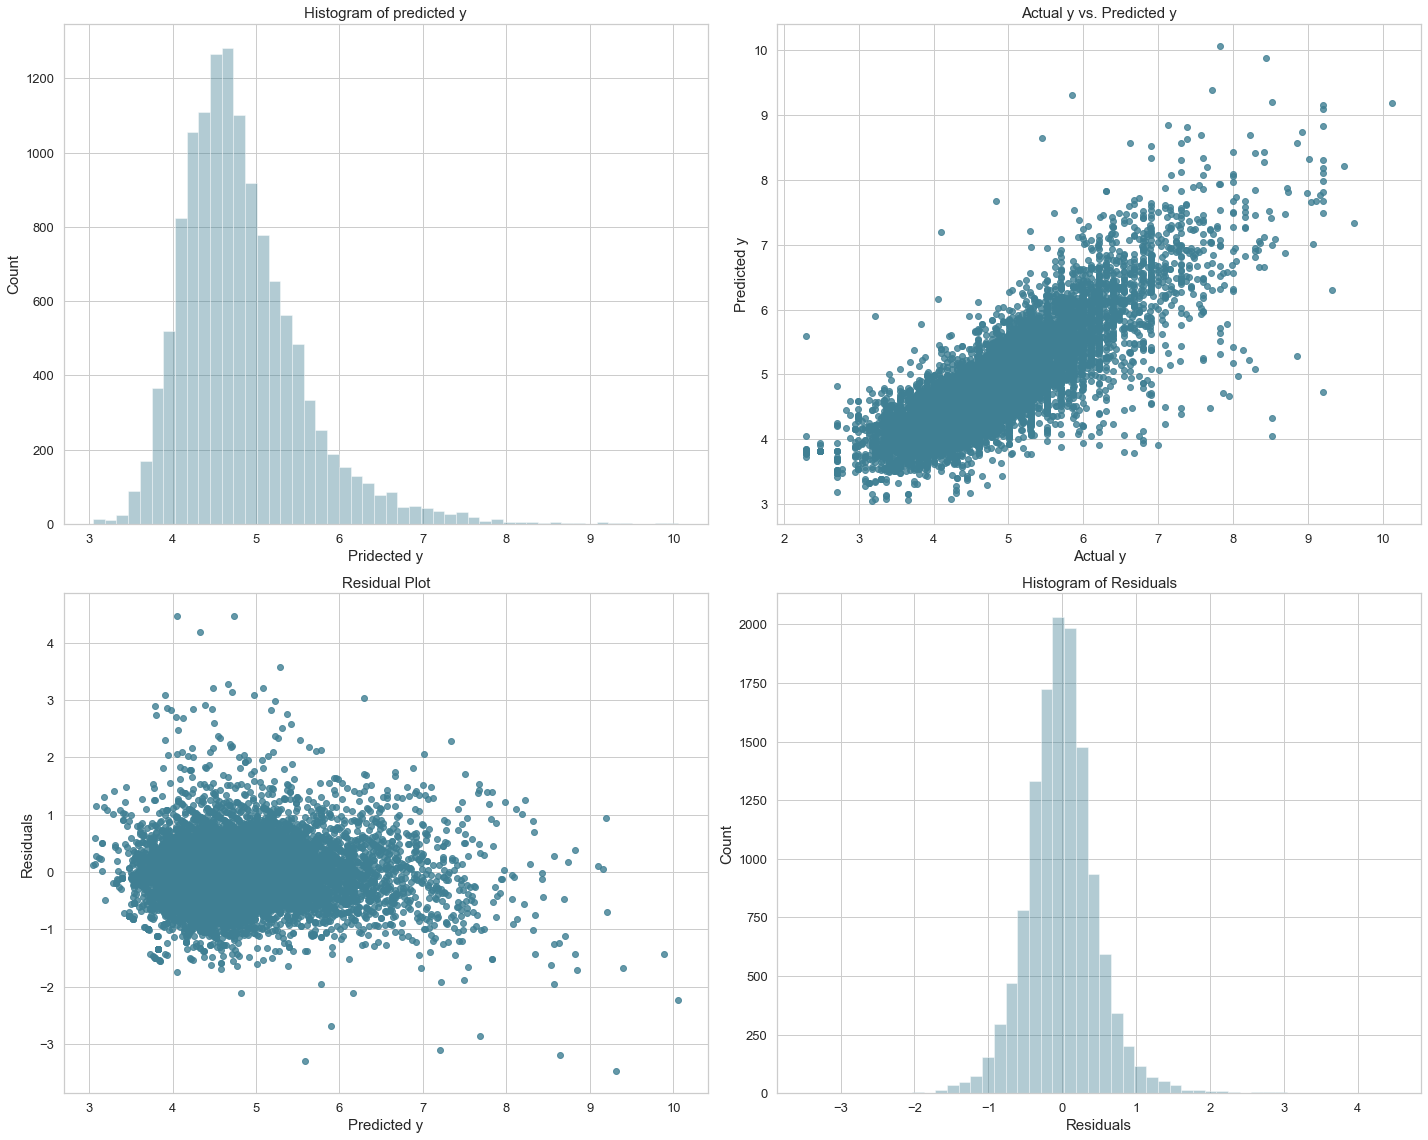

Model: RandomForest
Best Params: {'rf__max_depth': 50, 'rf__n_estimators': 90}
MSE is:  0.21218889792561954
RMSE is:  0.4606396616940616


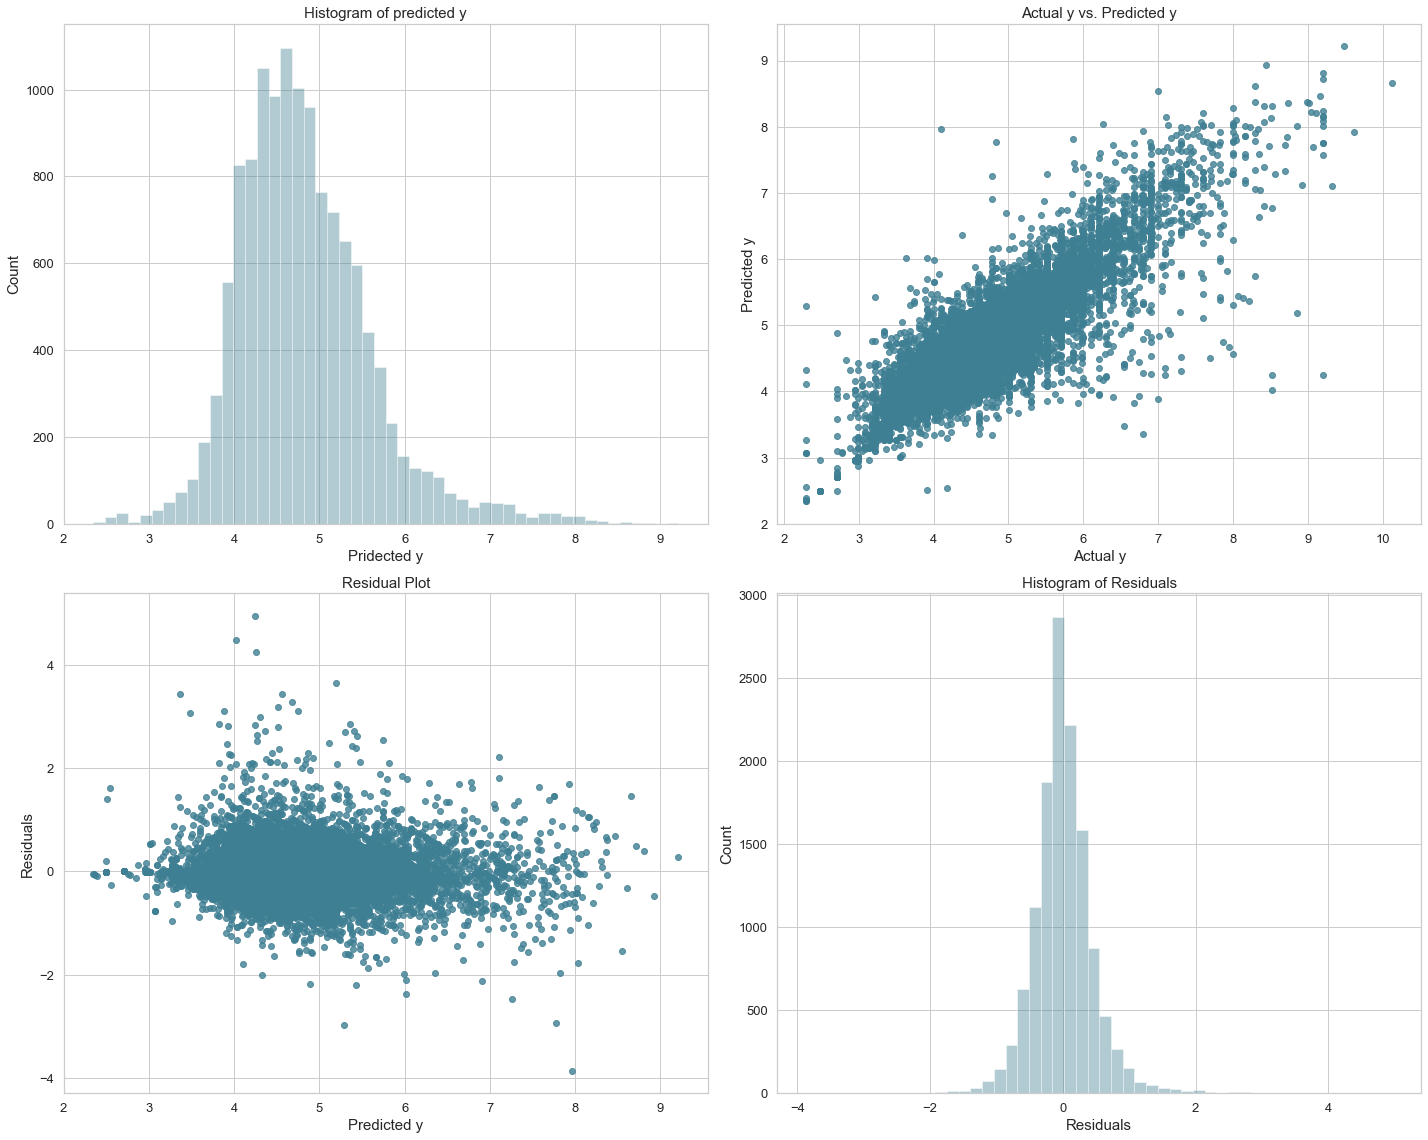

{'KNN': 0.54808975750239,
 'Linear': 112477429327.22057,
 'Ridge': 0.49605394364683836,
 'Lasso': 0.4963228851069728,
 'RandomForest': 0.4606396616940616}

In [61]:
y = df['logPrice'].to_numpy()
modelRmse_X_log = {}

def try_all_models(X, y):
    for model_name in Selected_Models:
        y_test, y_pred, rmse = model(model_name, X, y)
        modelRmse_X_log[model_name] = rmse
    return modelRmse_X_log

try_all_models(X, y)

### Results before adding amenities when target column is logPrice:
    {'KNN': 0.5371953013624292,
     'Lasso': 0.59908170149306,
     'Linear': 150412182696.2997,
     'RandomForest': 0.5283183644424506,
     'Ridge': 0.5991614904235171}
     
### Results after adding amenities when target column is logPrice:
    {'KNN': 0.54808975750239,
     'Lasso': 0.4963228851069728,
     'Linear': 112477429327.22057,
     'RandomForest': 0.4606396616940616
     'Ridge': 0.49605394364683836,}
     
### Adding property type does improve Lasso, Random Forest and Ridge results.

# Conclusion

+ I tried 5 different models on Airbnb listing price prediction
    + K-Nearest Neighbors
    + Linear Regression
    + Ridge Regression
    + Lasso Regression
    + Random Forest

+ KNN & random forest outperforms linear regression models. After adding more features, random forest performs better than KNN.
    + If looking at KNN results, after adding more features, the best parameter for n_neighbors becomes less. It might be because KNN depends on similar neighbor data points to get better prediction results. When adding more features, it increased dimensionality. With the curse of dimensionality. Number of similar data points seems to be becoming less, so RMSE started to get higher.
    + On the other hand, random forests by nature automatically select useful features when splitting so did not have this issue.
+ Linear regression models did not perform well because there are less data points with price above 500 and looks like they have a different linear relationship. For this piecewise linear regression should be used.
+ RSME can be improved further by fine tuning the hyperparameters.


# Future
+ Apply NLP on Airbnb reviews for better listing price prediction.
+ Apply models on other cities or training models on other cities.
+ Apply piecewise linear regression.
+ Apply ensemble models like Gradient Boosting